In [158]:
import numpy as np

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import warnings
warnings.filterwarnings("ignore")

import sklearn
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost
from xgboost.sklearn import XGBClassifier

from IPython.display import Image
import pydotplus
import pylab as pl
from pydotplus import graph_from_dot_data
import graphviz
from graphviz import Digraph

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection

from sklearn import svm
from sklearn.svm import SVC

from timeit import default_timer

import os
os.chdir(r"C:\Users\rahul\Documents\Main Projects\marketing_campaign Responce")

In [2]:
# # df = pd.read_csv("marketing_campaign.csv")
# df

In [3]:
# df = pd.read_csv("marketing_campaign.csv", sep=';')
# df

In [4]:
# df = pd.read_csv("marketing_campaign.csv", sep='\t')
# df

In [5]:
# df.to_csv(r"marketing_campaign_div.csv")

# Importing the Data Set

In [6]:
df = pd.read_csv("marketing_campaign_div.csv")
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Text(0.5, 1.0, 'Heat Map of Null Values')

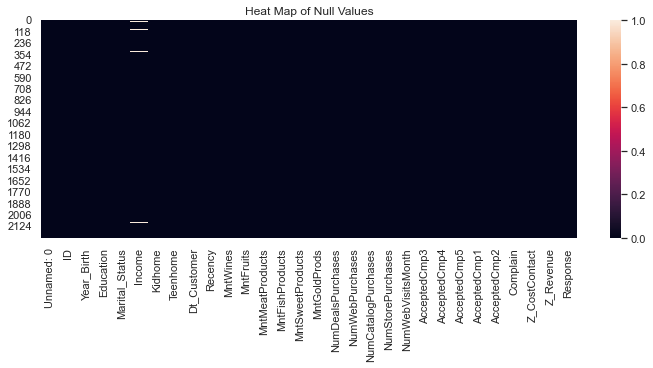

In [8]:
sns.heatmap(df.isnull())
plt.title("Heat Map of Null Values")

In [9]:
df.shape

(2240, 30)

### Droping Null values

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

Text(0.5, 1.0, 'Heat Map of Null Values after treatment')

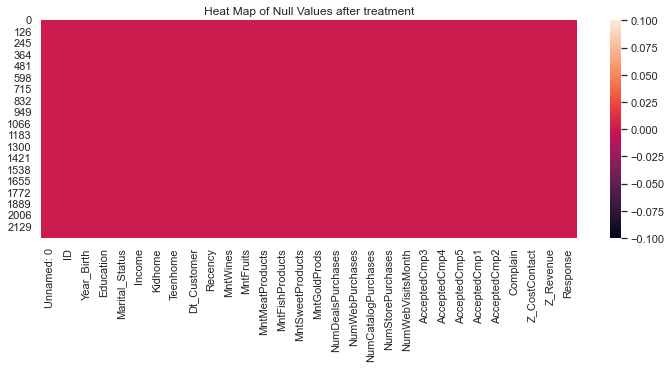

In [13]:
sns.heatmap(df.isnull())
plt.title("Heat Map of Null Values after treatment")

In [14]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,1121.867329,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,643.164161,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,566.750000,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1120.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1678.250000,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [15]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df.shape

(2216, 30)

### 29 Columns & 1 Target Variable

# 

# Exploratory Data Analysis

## Taget Variable Response

In [17]:
df.Response.value_counts()

0    1883
1     333
Name: Response, dtype: int64

Text(0.5, 1.0, 'Count/ Bar plot of Response(Target)')

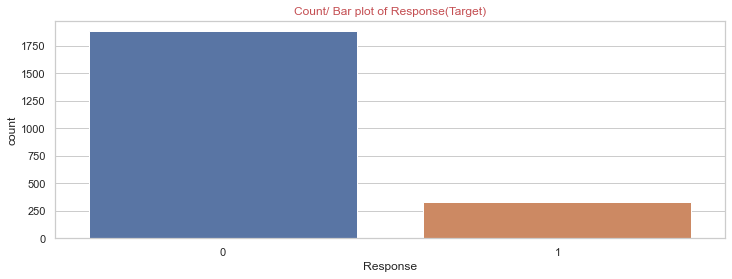

In [18]:
sns.countplot(df.Response)
plt.title("Count/ Bar plot of Response(Target)", color="r")

# 

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [20]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,1121.867329,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,643.164161,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,566.750000,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1120.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1678.250000,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

In [22]:
count = []

for i in df.columns:
    temp = df[i].value_counts()
    temp.name = i
    count.append(temp)
df_value_counts = pd.concat(count, axis=1)

count

[0       1
 571     1
 559     1
 561     1
 563     1
        ..
 1296    1
 1294    1
 1292    1
 1290    1
 2047    1
 Name: Unnamed: 0, Length: 2216, dtype: int64,
 0        1
 3479     1
 2694     1
 4743     1
 10888    1
         ..
 202      1
 5376     1
 4552     1
 7419     1
 4094     1
 Name: ID, Length: 2216, dtype: int64,
 1976    89
 1971    86
 1975    83
 1972    78
 1978    76
 1970    75
 1965    74
 1973    72
 1969    70
 1974    69
 1956    55
 1979    53
 1977    52
 1958    52
 1952    52
 1968    51
 1966    50
 1959    50
 1960    49
 1954    49
 1955    48
 1963    44
 1967    44
 1982    44
 1962    44
 1951    42
 1986    41
 1983    41
 1957    41
 1964    41
 1980    39
 1984    38
 1981    38
 1961    35
 1953    35
 1985    32
 1949    30
 1989    29
 1988    29
 1950    29
 1987    27
 1948    21
 1990    18
 1947    16
 1946    16
 1991    15
 1992    13
 1945     8
 1944     7
 1943     6
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 

# 

# Droping unwanted columns

In [23]:
df.drop(["Unnamed: 0", "ID", "Z_Revenue", "Z_CostContact"], axis=1, inplace=True)

In [24]:
df.shape

(2216, 26)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [26]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# Dealing with Date Column

In [27]:
#Changing the datatype being its a date
df['Date'] = pd.to_datetime(df['Dt_Customer'])

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [28]:
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Date,Year,Month,Day
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-04-09,2012,4,9
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-08-03,2014,8,3
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-08-21,2013,8,21


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   object        
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-nul

In [30]:
df.drop(["Date", "Dt_Customer"], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [32]:
df.shape

(2216, 28)

# Value Counts

In [33]:
count = []

for i in df.columns:
    temp = df[i].value_counts()
    temp.name = i
    count.append(temp)
df_value_counts = pd.concat(count, axis=1)

count

[1976    89
 1971    86
 1975    83
 1972    78
 1978    76
 1970    75
 1965    74
 1973    72
 1969    70
 1974    69
 1956    55
 1979    53
 1977    52
 1958    52
 1952    52
 1968    51
 1966    50
 1959    50
 1960    49
 1954    49
 1955    48
 1963    44
 1967    44
 1982    44
 1962    44
 1951    42
 1986    41
 1983    41
 1957    41
 1964    41
 1980    39
 1984    38
 1981    38
 1961    35
 1953    35
 1985    32
 1949    30
 1989    29
 1988    29
 1950    29
 1987    27
 1948    21
 1990    18
 1947    16
 1946    16
 1991    15
 1992    13
 1945     8
 1944     7
 1943     6
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1941     1
 1899     1
 1940     1
 1893     1
 Name: Year_Birth, dtype: int64,
 Graduation    1116
 PhD            481
 Master         365
 2n Cycle       200
 Basic           54
 Name: Education, dtype: int64,
 Married     857
 Together    573
 Single      471
 Divorced    232
 Widow        76
 Alone         3
 Absurd        2
 YOLO   

In [34]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Day'],
      dtype='object')

# 

# Continuous Variables

In [35]:
df_cont = df[['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
              'NumStorePurchases', 'NumWebVisitsMonth', 'Month', 'Day']]

df_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  Month                2216 non-null   int64  
 15  Day                  2216 non-null   i

# Visualization of Continuous Variables

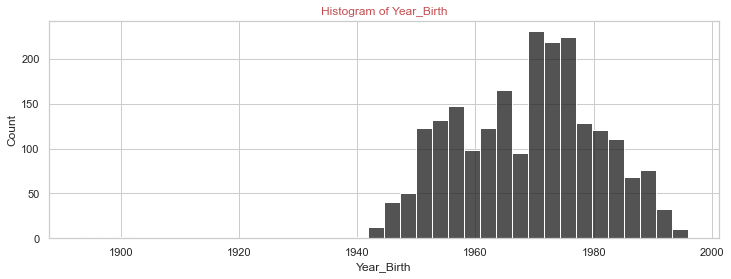

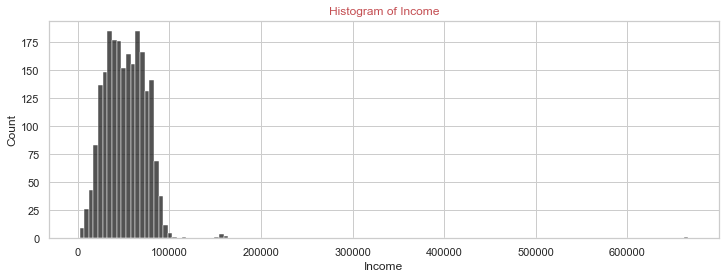

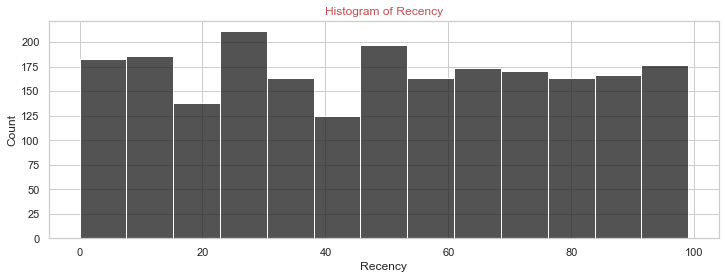

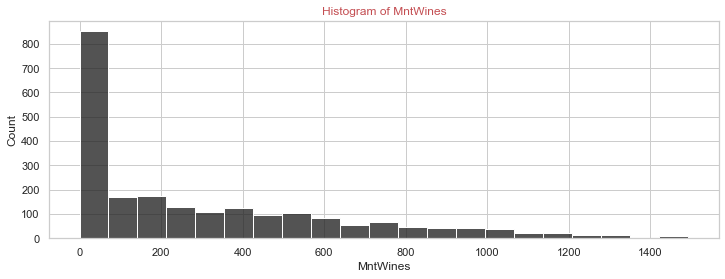

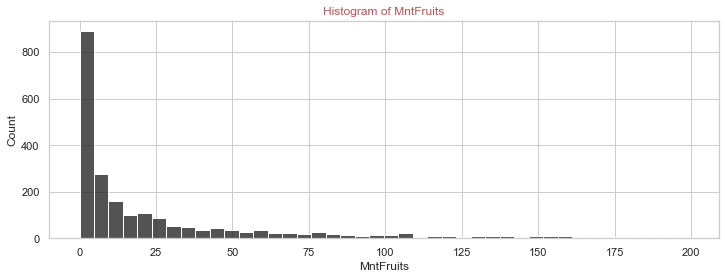

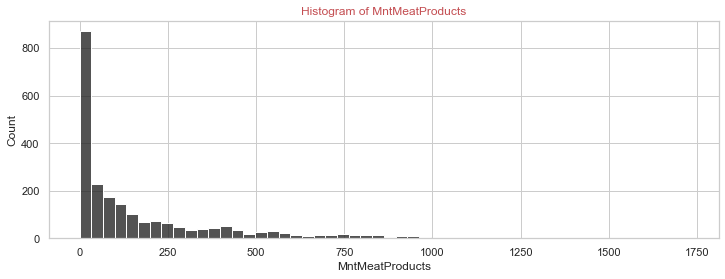

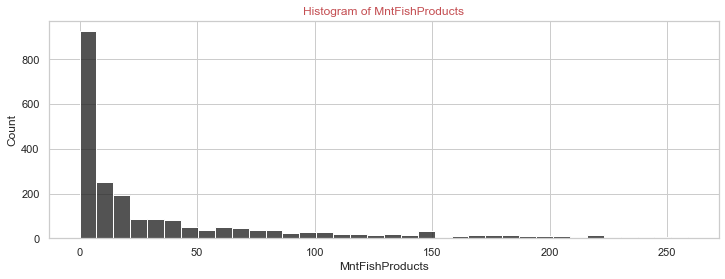

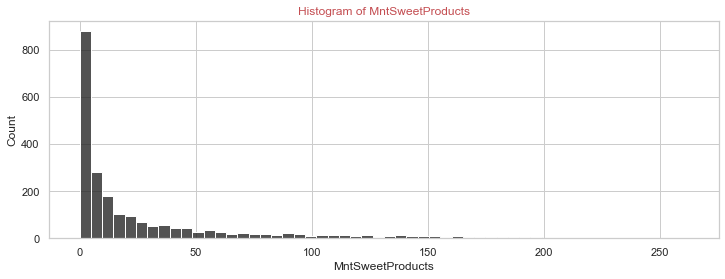

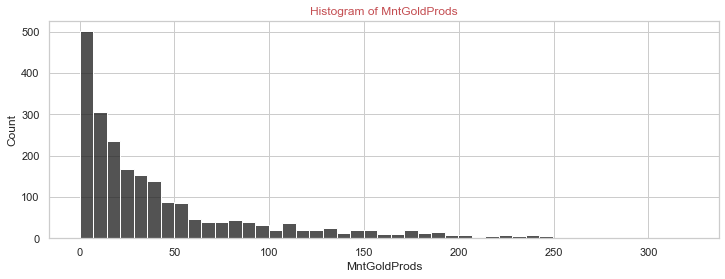

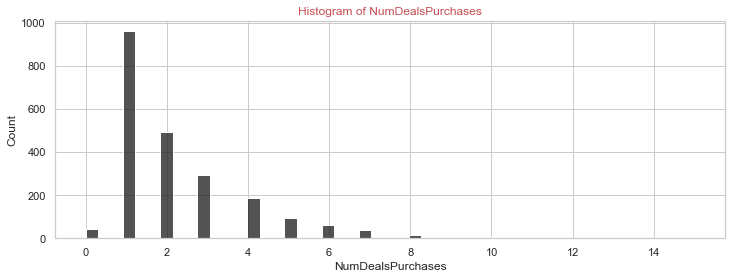

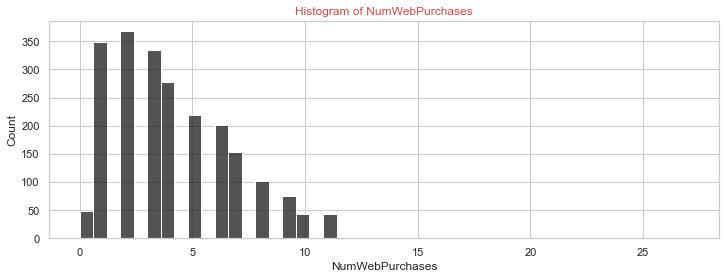

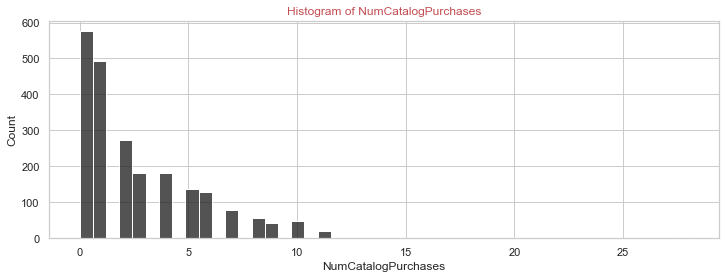

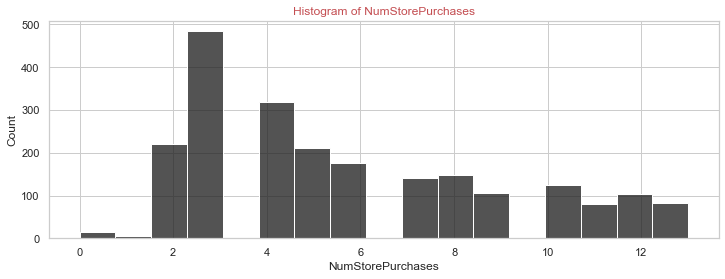

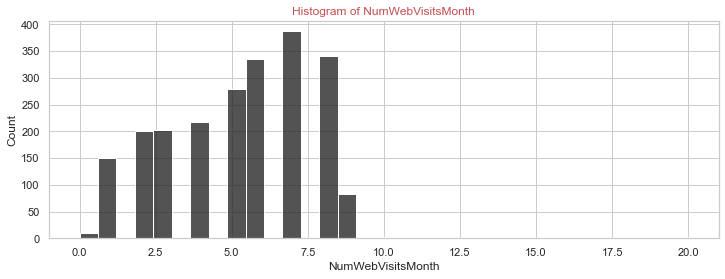

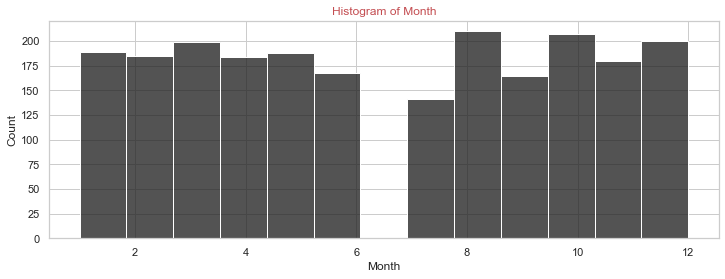

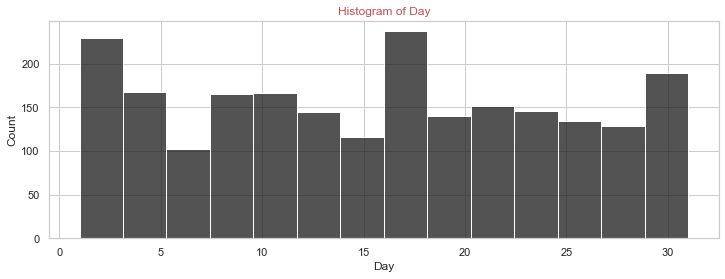

In [36]:
for i in df_cont.columns:
    sns.histplot(df_cont[i], color= "k")
    plt.title(f"Histogram of {i}", color = "r")
    plt.show()

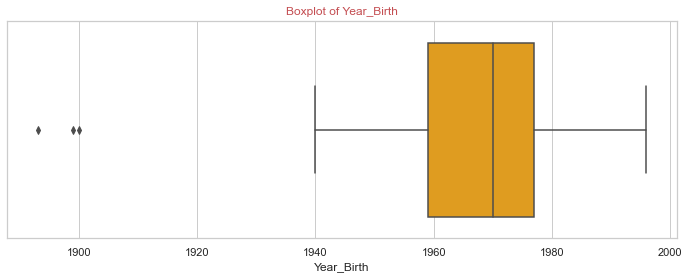

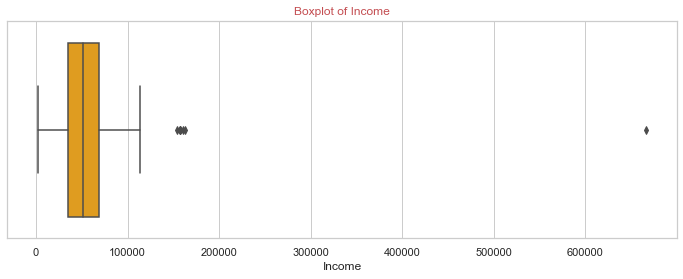

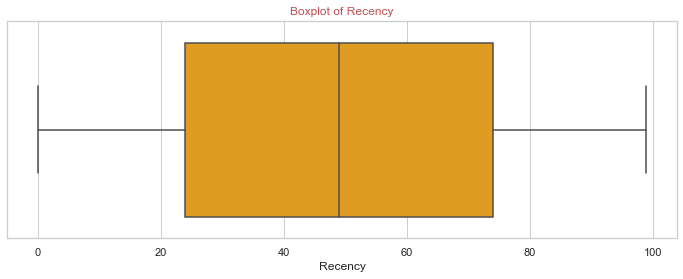

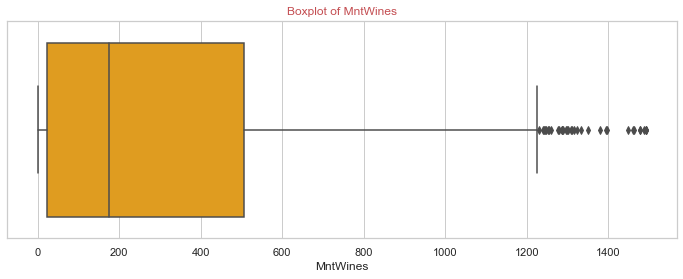

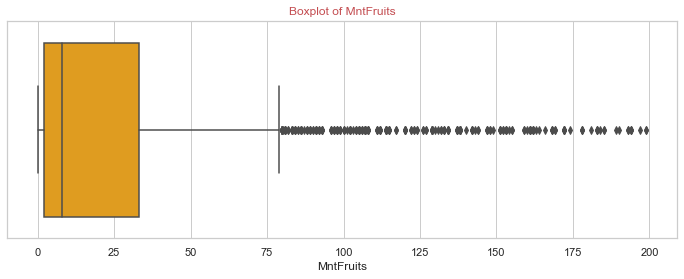

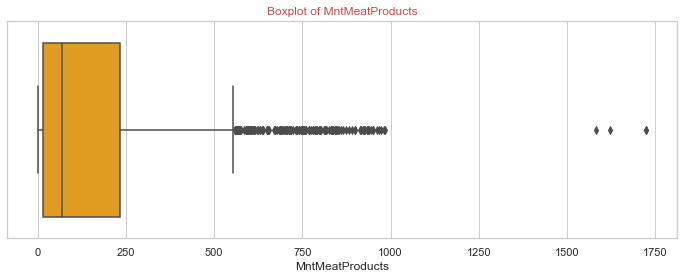

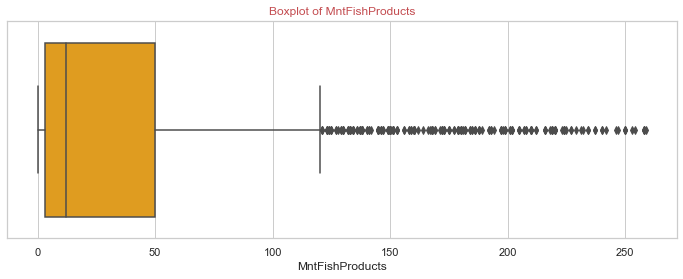

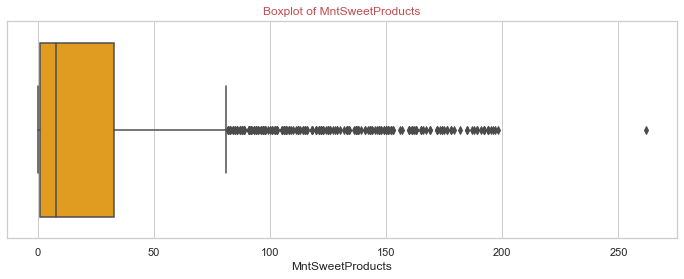

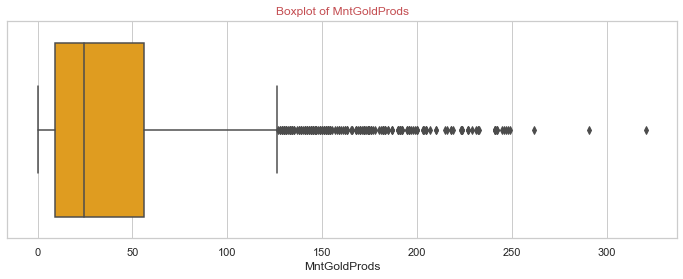

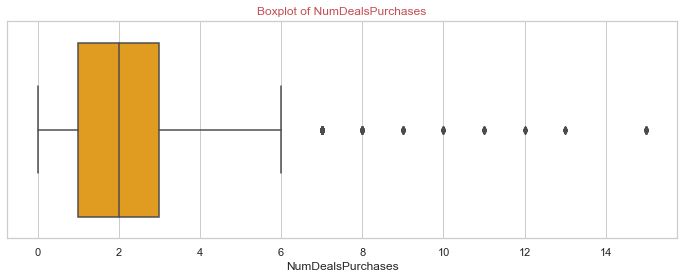

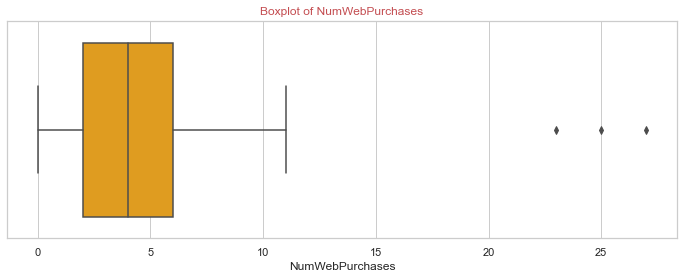

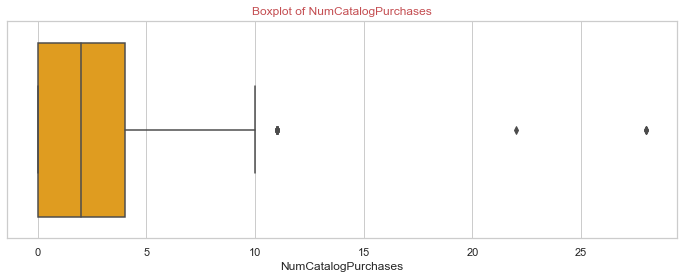

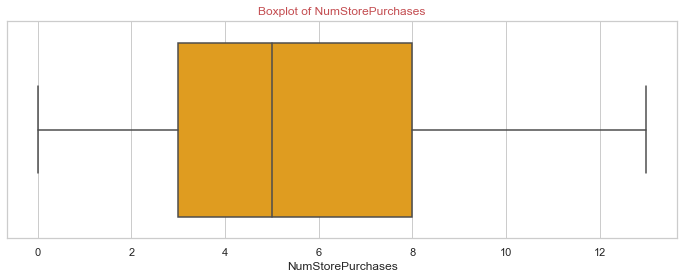

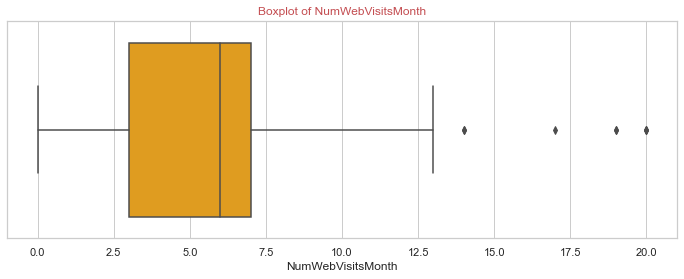

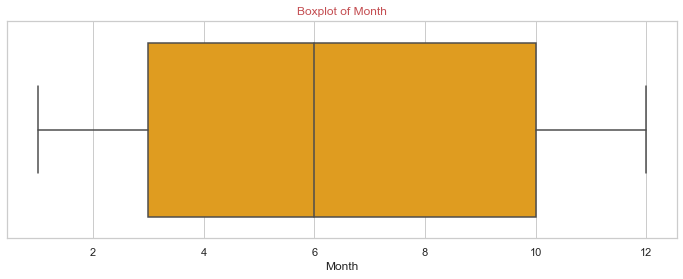

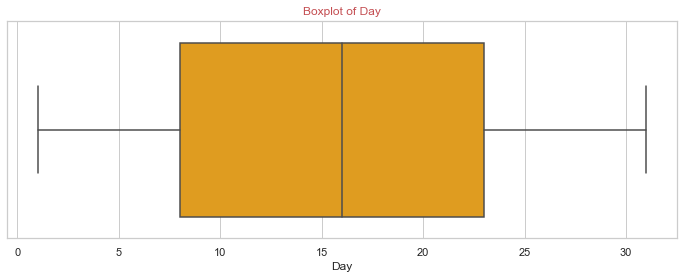

In [37]:
for i in df_cont.columns:
    sns.boxplot(df_cont[i], color = "orange")
    plt.title(f"Boxplot of {i}", color = "r")
    plt.show()

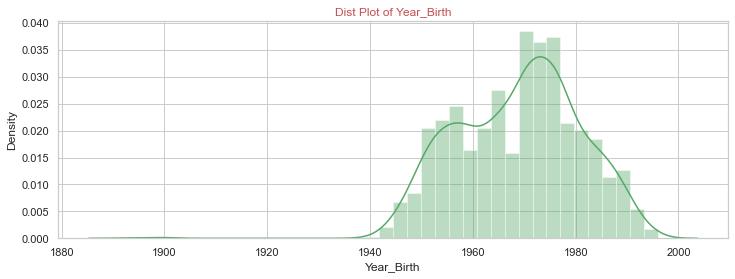

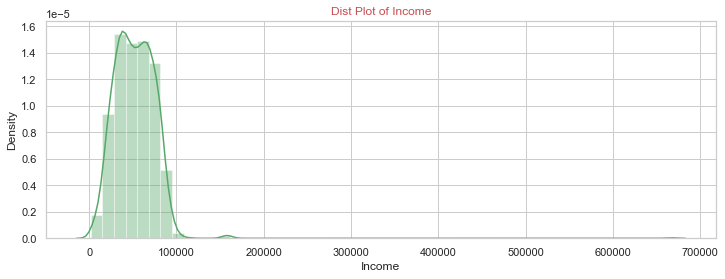

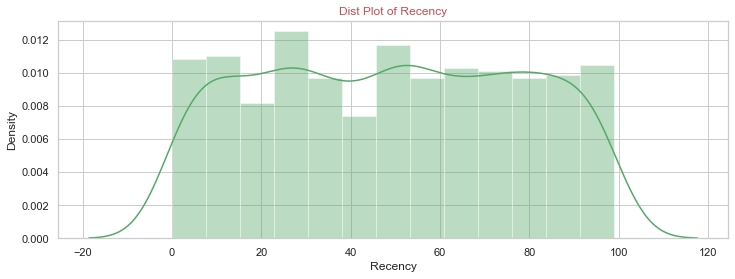

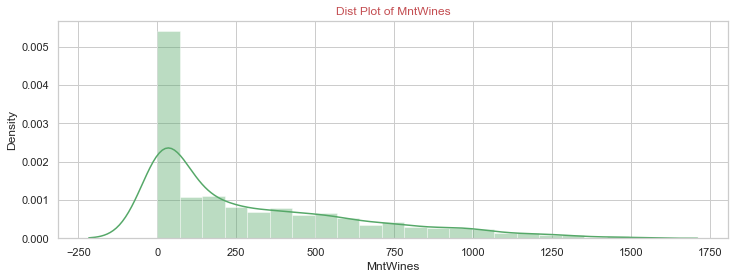

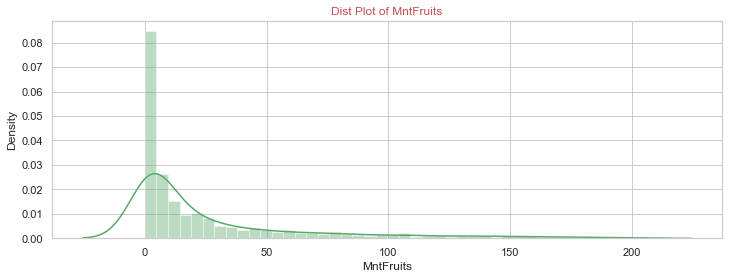

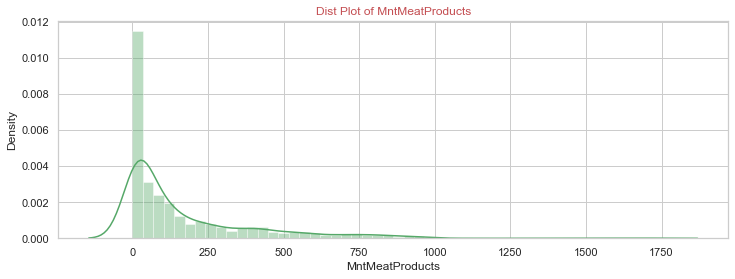

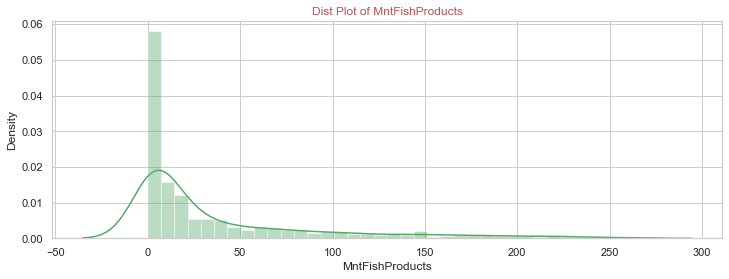

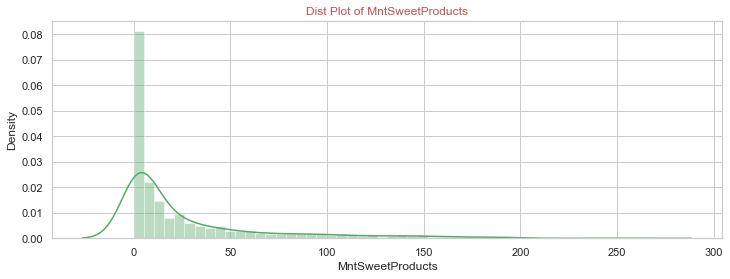

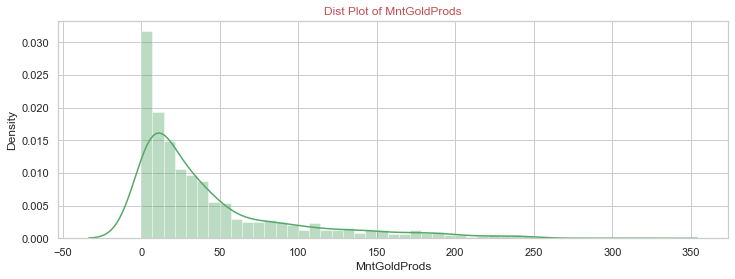

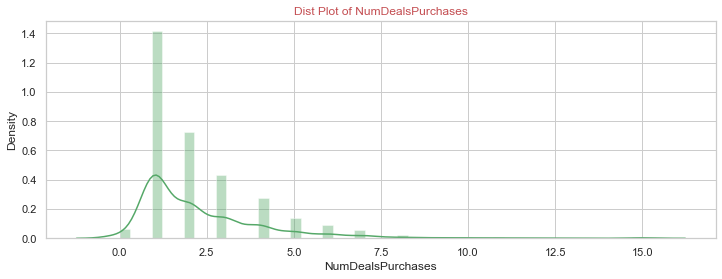

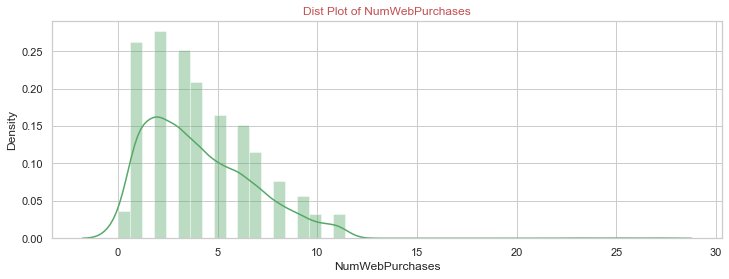

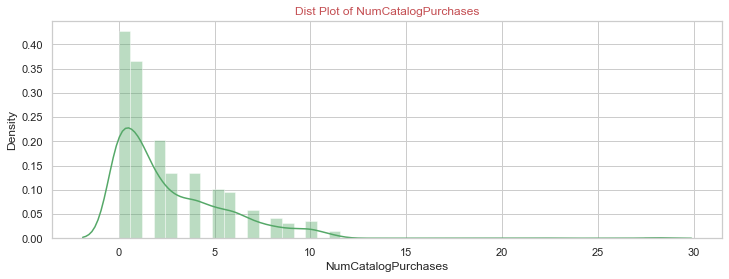

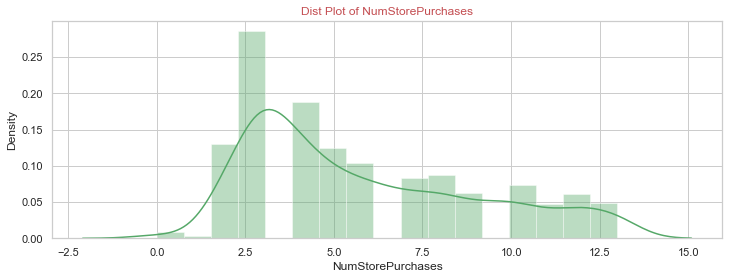

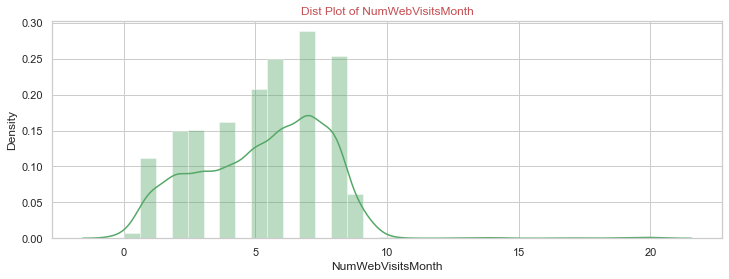

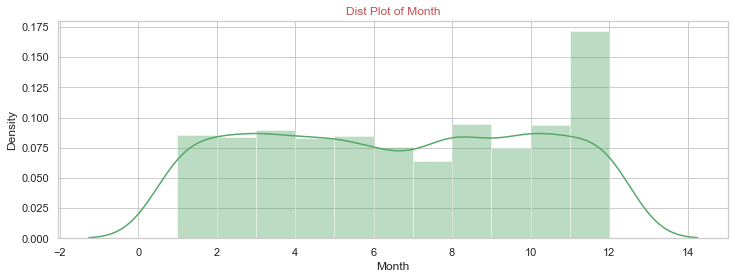

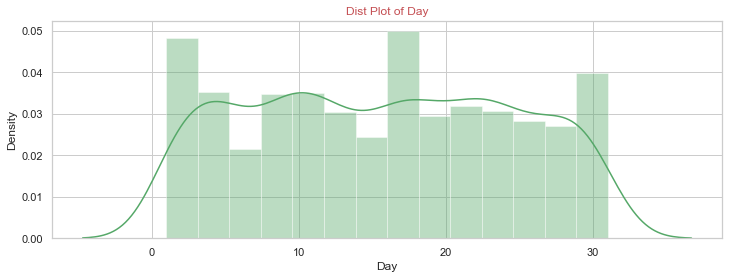

In [38]:
for i in df_cont.columns:
    sns.distplot(df_cont[i], color = "g")
    plt.title(f"Dist Plot of {i}", color = "r")
    plt.show()

# 

# Hypotesis Testing for Continuous Variables

In [39]:
col_dict = {'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
              'NumStorePurchases', 'NumWebVisitsMonth', 'Month', 'Day'}

for columns in  col_dict:
    mod_S = ols('Response ~ df[columns]', data = df).fit()
    aov = sm.stats.anova_lm(mod_S)
    print(columns)
    print(aov)
    
    print("")

NumWebPurchases
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    6.488670  6.488670  51.961716  7.729161e-13
Residual     2214.0  276.471167  0.124874        NaN           NaN

Income
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    5.008789  5.008789  39.897169  3.225569e-10
Residual     2214.0  277.951048  0.125542        NaN           NaN

MntMeatProducts
                 df      sum_sq    mean_sq           F        PR(>F)
df[columns]     1.0   15.993841  15.993841  132.639975  7.539830e-30
Residual     2214.0  266.965997   0.120581         NaN           NaN

MntFruits
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    4.242193  4.242193  33.697959  7.362753e-09
Residual     2214.0  278.717644  0.125889        NaN           NaN

Year_Birth
                 df      sum_sq   mean_sq         F    PR(>F)
df[columns]     1.0    0.158830  0.158830  1.243453  0.264928
Re

# 

# Categorical Variables

In [40]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Day'],
      dtype='object')

In [41]:
df_cat = df[["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4",
             "AcceptedCmp5", "AcceptedCmp2", "AcceptedCmp1", "Complain", "Year"]]

df_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp2,AcceptedCmp1,Complain,Year
0,Graduation,Single,0,0,0,0,0,0,0,0,2012
1,Graduation,Single,1,1,0,0,0,0,0,0,2014
2,Graduation,Together,0,0,0,0,0,0,0,0,2013
3,Graduation,Together,1,0,0,0,0,0,0,0,2014
4,PhD,Married,1,0,0,0,0,0,0,0,2014


In [42]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2216 non-null   object
 1   Marital_Status  2216 non-null   object
 2   Kidhome         2216 non-null   int64 
 3   Teenhome        2216 non-null   int64 
 4   AcceptedCmp3    2216 non-null   int64 
 5   AcceptedCmp4    2216 non-null   int64 
 6   AcceptedCmp5    2216 non-null   int64 
 7   AcceptedCmp2    2216 non-null   int64 
 8   AcceptedCmp1    2216 non-null   int64 
 9   Complain        2216 non-null   int64 
 10  Year            2216 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 272.3+ KB


In [43]:
df_cat.columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1',
       'Complain', 'Year'],
      dtype='object')

# Visualization of Categorical Variables

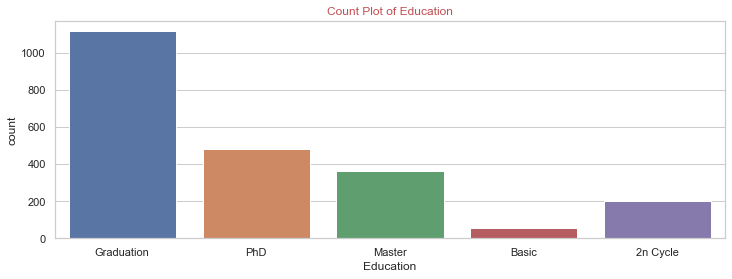

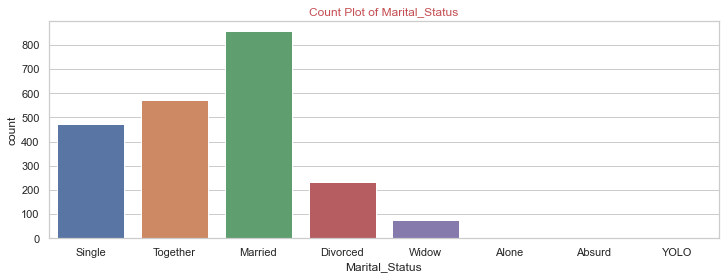

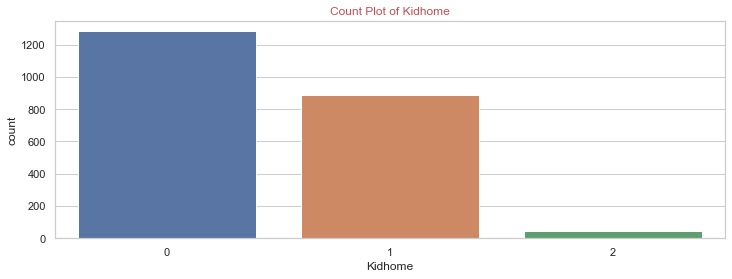

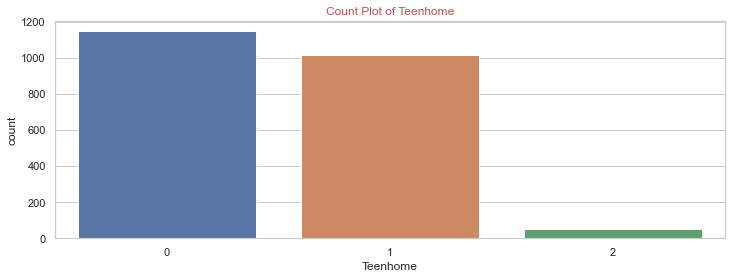

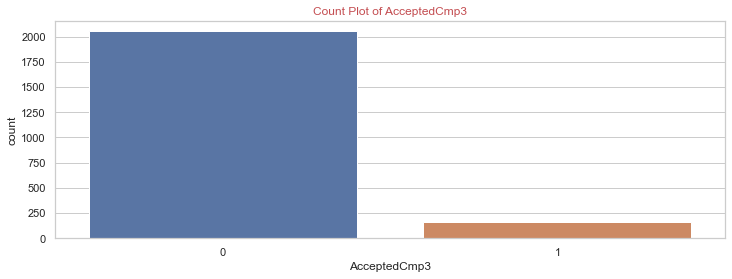

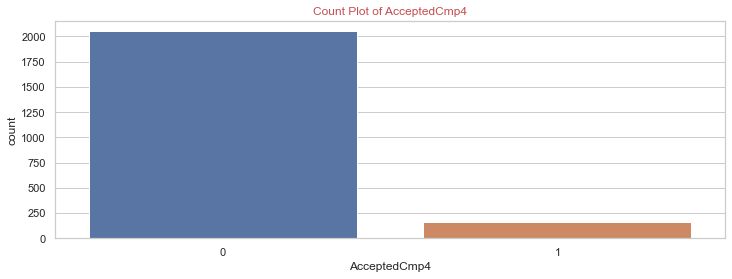

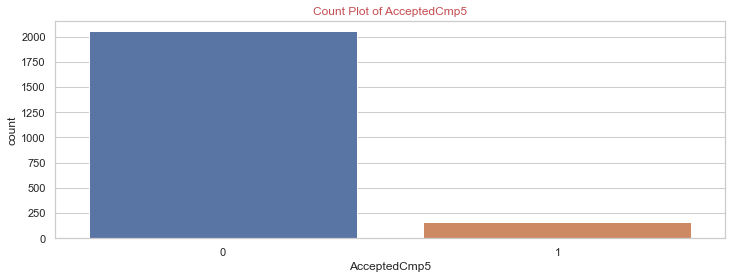

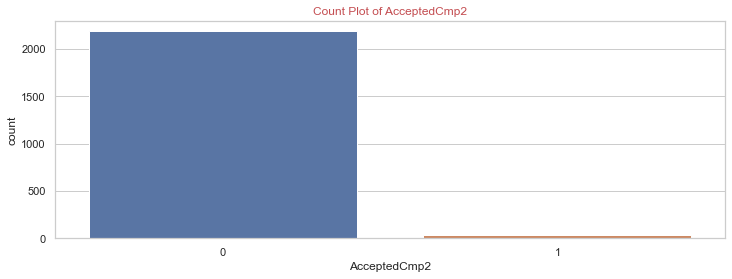

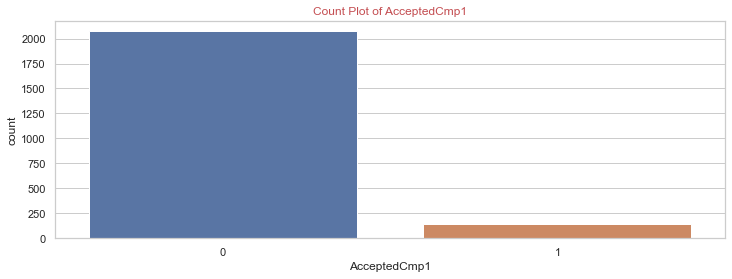

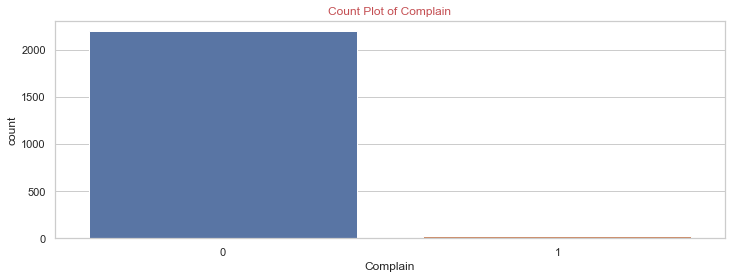

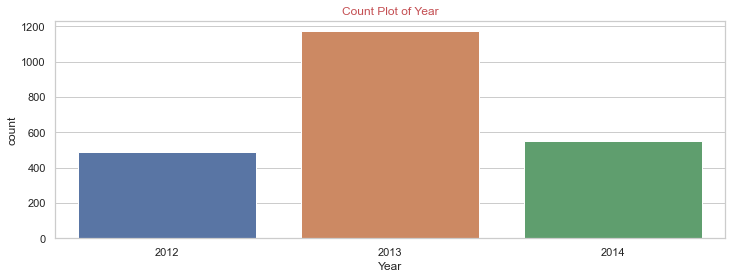

In [44]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.title(f"Count Plot of {i}", color="r")
    plt.show()

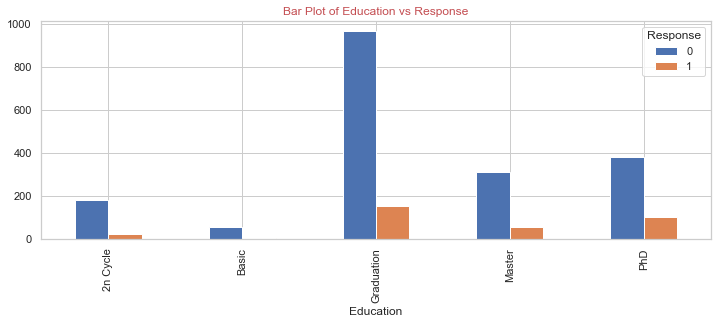

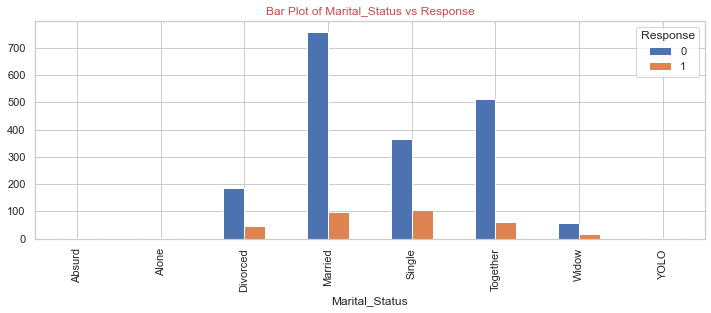

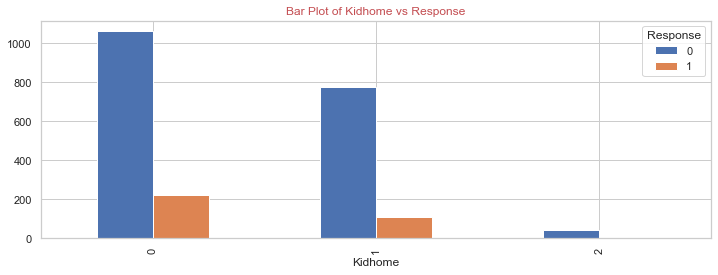

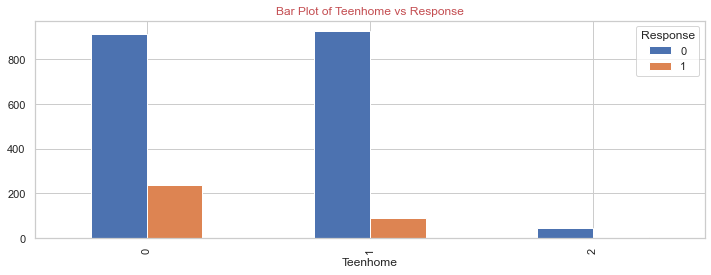

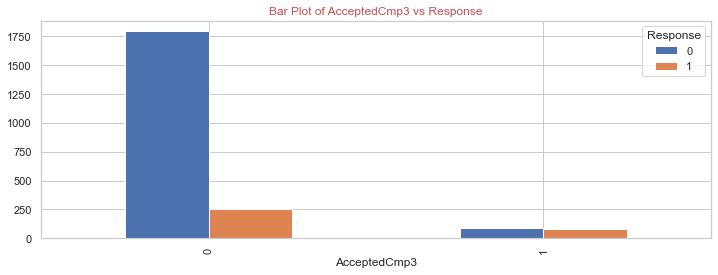

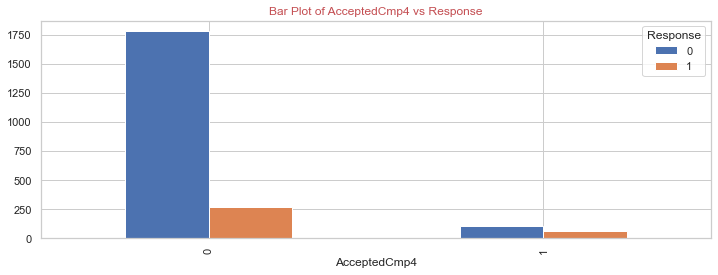

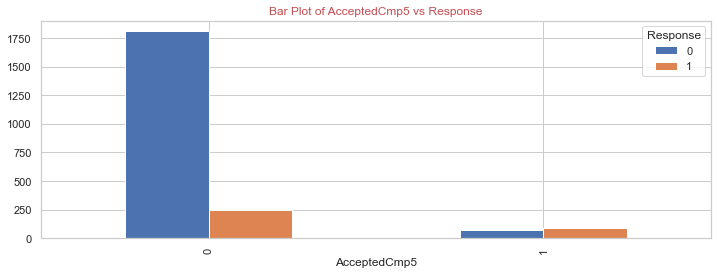

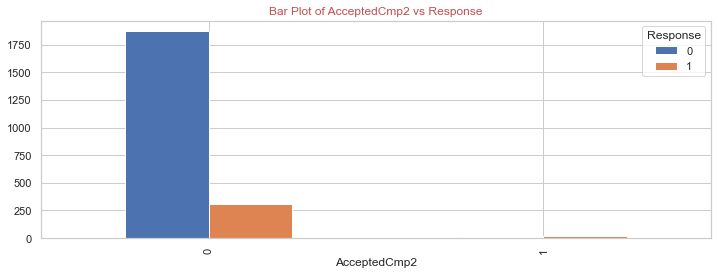

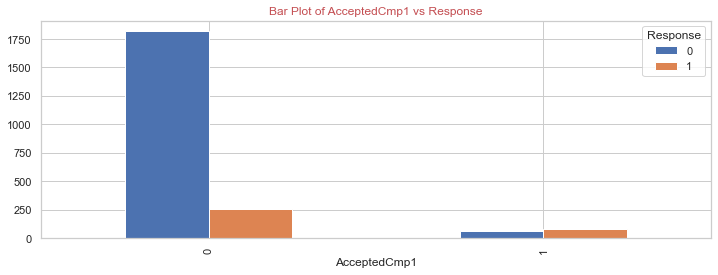

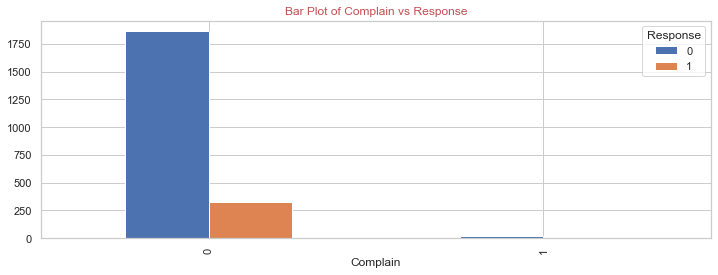

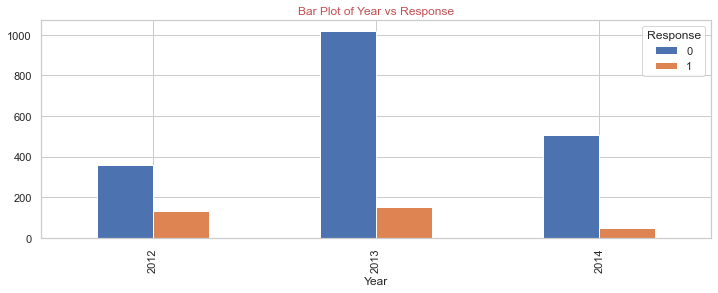

In [45]:
for i in df_cat.columns:
    pd.crosstab(df_cat[i], df.Response).plot(kind='bar')
    plt.title(f"Bar Plot of {i} vs Response", color="r")
    plt.show()

# Hpyotesis Testing of Categorical

In [46]:
col_dict = {"Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4",
             "AcceptedCmp5", "AcceptedCmp2", "AcceptedCmp1", "Complain", "Year"}

for columns in  col_dict:
    mod_S = ols('Response ~ df[columns]', data = df).fit()
    aov = sm.stats.anova_lm(mod_S, type=2)
    print(columns)
    print(aov)
    
    print("")

Marital_Status
                 df      sum_sq   mean_sq         F        PR(>F)
df[columns]     7.0    6.832247  0.976035  7.804674  2.321316e-09
Residual     2208.0  276.127591  0.125058       NaN           NaN

AcceptedCmp3
                 df      sum_sq    mean_sq           F        PR(>F)
df[columns]     1.0   18.256136  18.256136  152.695579  5.723330e-34
Residual     2214.0  264.703702   0.119559         NaN           NaN

Teenhome
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    6.702068  6.702068  53.712074  3.236900e-13
Residual     2214.0  276.257770  0.124778        NaN           NaN

Complain
                 df      sum_sq   mean_sq         F    PR(>F)
df[columns]     1.0    0.001165  0.001165  0.009117  0.923938
Residual     2214.0  282.958672  0.127804       NaN       NaN

AcceptedCmp1
                 df      sum_sq    mean_sq           F        PR(>F)
df[columns]     1.0   25.017581  25.017581  214.733816  1.778667e-46
Residua

In [47]:
col_dict = {"Education", "Marital_Status", "Kidhome", "Teenhome", "Year"}

for columns in  col_dict:
    tuk_hsd = pairwise_tukeyhsd(df.Response, df[columns], alpha = 0.05)
    print(columns)
    print("\n", tuk_hsd)
    
    print("")

Marital_Status

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  Absurd    Alone  -0.1667    0.9  -1.146  0.8127  False
  Absurd Divorced  -0.2931    0.9  -1.055  0.4688  False
  Absurd  Married  -0.3856 0.7584 -1.1452  0.3739  False
  Absurd   Single  -0.2749    0.9 -1.0352  0.4853  False
  Absurd Together  -0.3953 0.7359 -1.1552  0.3647  False
  Absurd    Widow  -0.2632    0.9 -1.0317  0.5054  False
  Absurd     YOLO      0.0    0.9 -1.0729  1.0729  False
   Alone Divorced  -0.1264    0.9 -0.7498   0.497  False
   Alone  Married   -0.219    0.9 -0.8395  0.4015  False
   Alone   Single  -0.1083    0.9 -0.7297  0.5131  False
   Alone Together  -0.2286    0.9 -0.8497  0.3924  False
   Alone    Widow  -0.0965    0.9  -0.728   0.535  False
   Alone     YOLO   0.1667    0.9 -0.8127   1.146  False
Divorced  Married  -0.0925 0.0098 -0.1719 -0.0131   True
Divorced   Sin

# 

# Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

columns = ["Education", "Marital_Status"]

le_list = {}

for column in columns:
    encoder = LabelEncoder()
    le_list[column] = encoder
    df[column] = encoder.fit_transform(df[column])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Day
0,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,4,9
1,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,8,3
2,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,10,2
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,19


In [49]:
df_cat = df[["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4",
             "AcceptedCmp5", "AcceptedCmp2", "AcceptedCmp1", "Complain", "Year"]]

df_cat.head()

,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp2,AcceptedCmp1,Complain,Year
0,2,4,0,0,0,0,0,0,0,0,2012
1,2,4,1,1,0,0,0,0,0,0,2014
2,2,5,0,0,0,0,0,0,0,0,2013
3,2,5,1,0,0,0,0,0,0,0,2014
4,4,3,1,0,0,0,0,0,0,0,2014


In [50]:
count = []

for i in df.columns:
    temp = df[i].value_counts()
    temp.name = i
    count.append(temp)
df_value_counts = pd.concat(count, axis=1)

count

[1976    89
 1971    86
 1975    83
 1972    78
 1978    76
 1970    75
 1965    74
 1973    72
 1969    70
 1974    69
 1956    55
 1979    53
 1977    52
 1958    52
 1952    52
 1968    51
 1966    50
 1959    50
 1960    49
 1954    49
 1955    48
 1963    44
 1967    44
 1982    44
 1962    44
 1951    42
 1986    41
 1983    41
 1957    41
 1964    41
 1980    39
 1984    38
 1981    38
 1961    35
 1953    35
 1985    32
 1949    30
 1989    29
 1988    29
 1950    29
 1987    27
 1948    21
 1990    18
 1947    16
 1946    16
 1991    15
 1992    13
 1945     8
 1944     7
 1943     6
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1941     1
 1899     1
 1940     1
 1893     1
 Name: Year_Birth, dtype: int64,
 2    1116
 4     481
 3     365
 0     200
 1      54
 Name: Education, dtype: int64,
 3    857
 5    573
 4    471
 2    232
 6     76
 1      3
 0      2
 7      2
 Name: Marital_Status, dtype: int64,
 7500.0     12
 35860.0     4
 18929.0     3
 34176.0  

# Visualization of Categorical Variables after Label Encoding

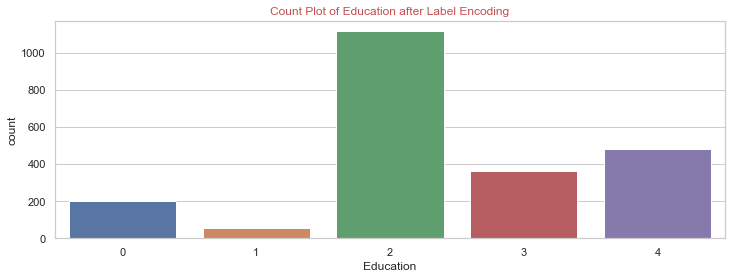

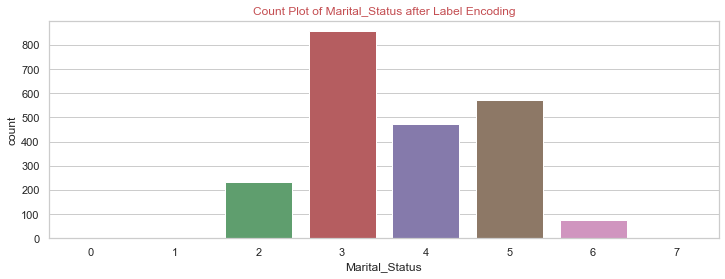

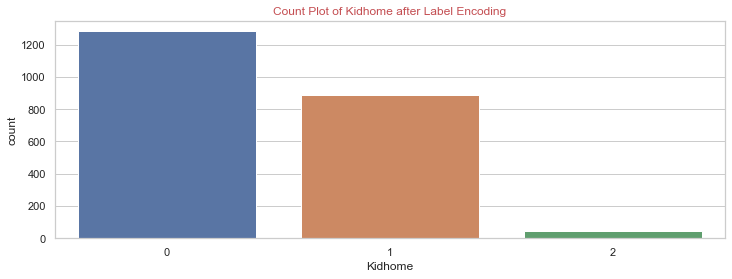

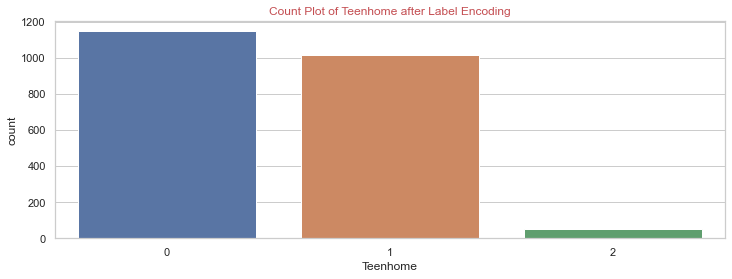

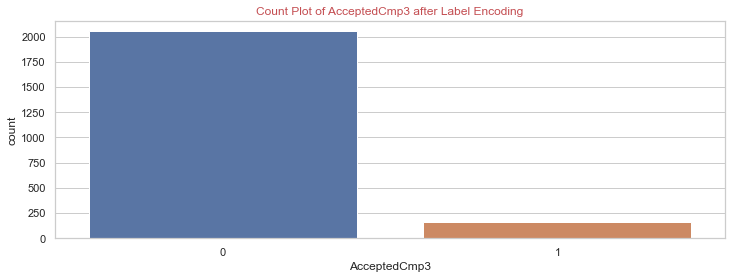

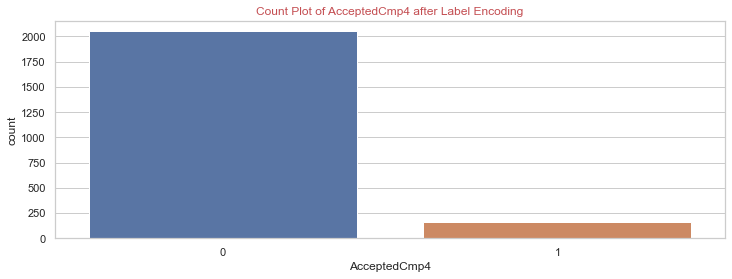

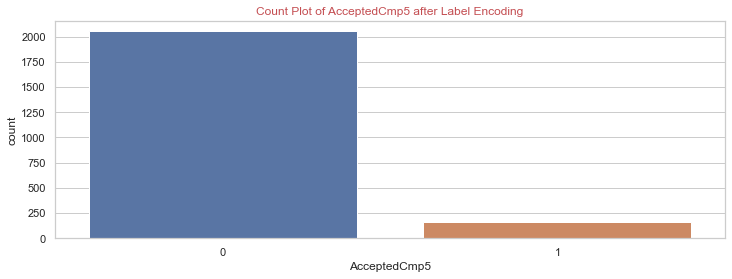

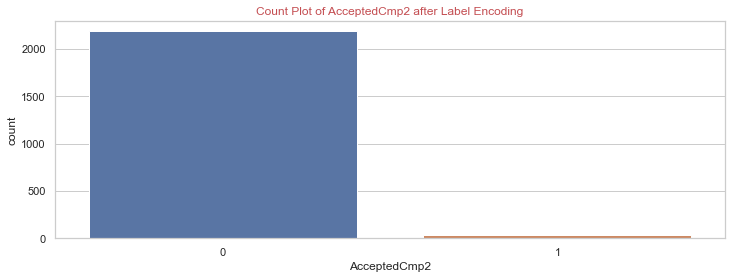

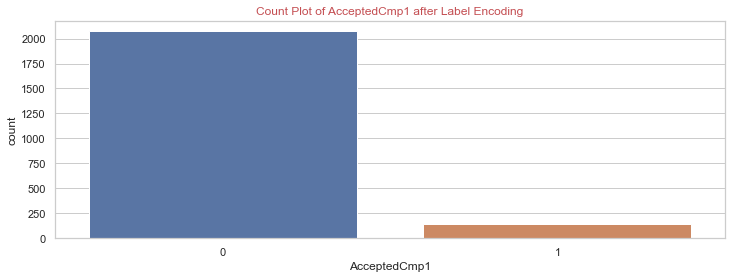

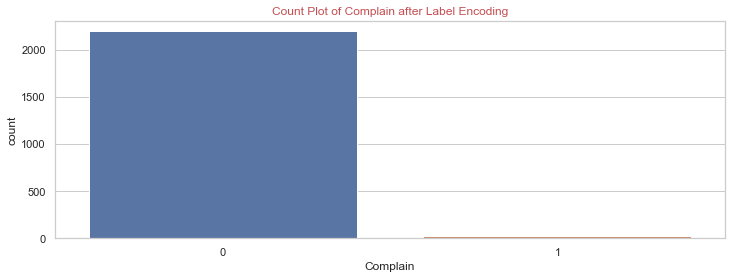

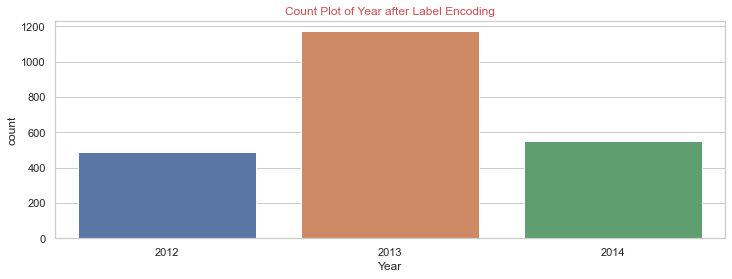

In [51]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.title(f"Count Plot of {i} after Label Encoding", color="r")
    plt.show()

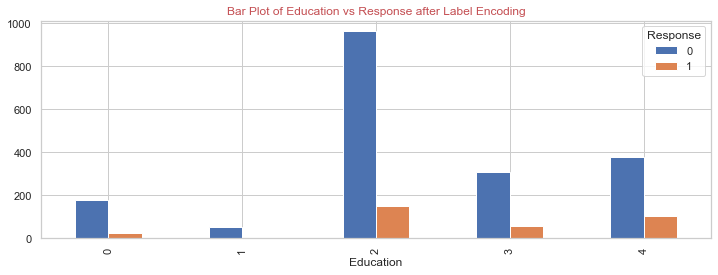

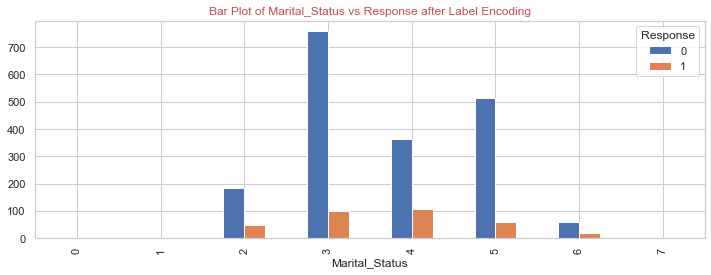

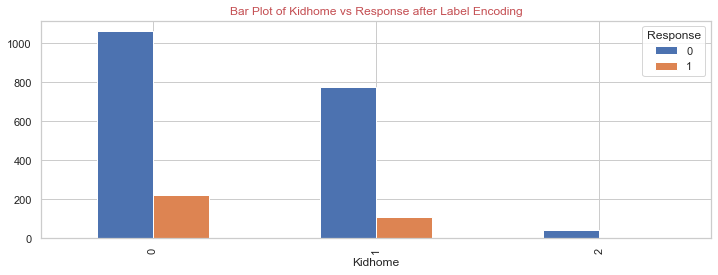

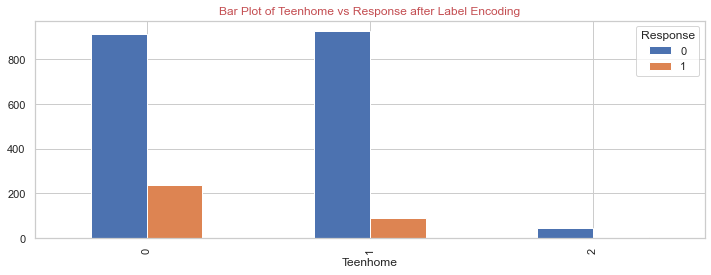

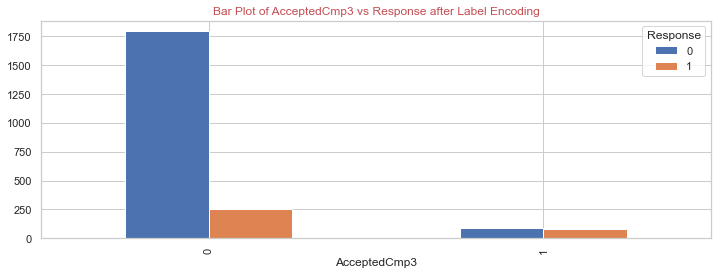

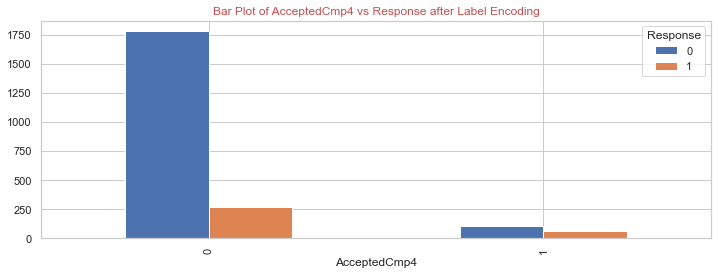

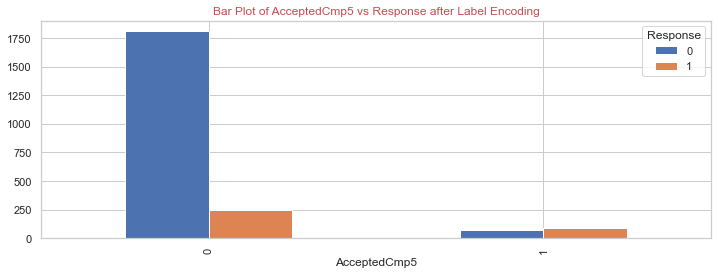

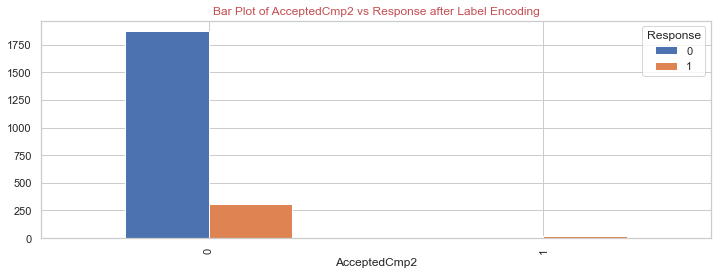

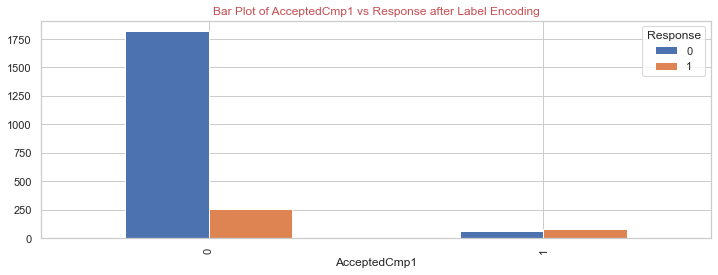

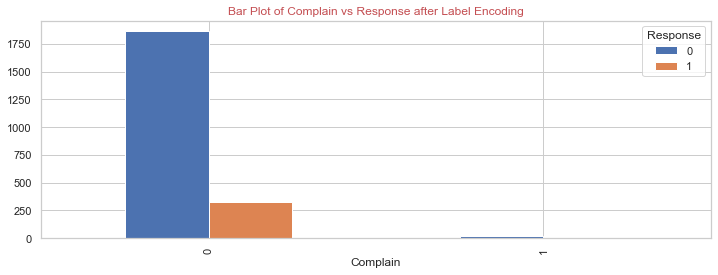

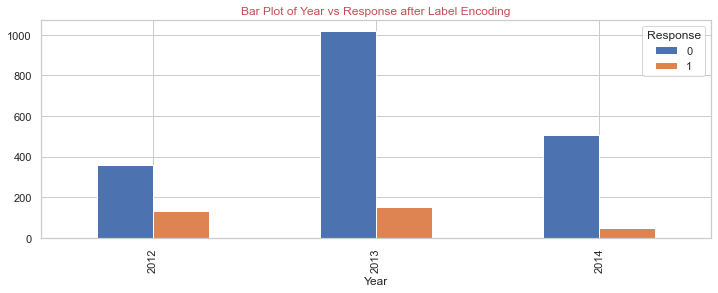

In [52]:
for i in df_cat.columns:
    pd.crosstab(df_cat[i], df.Response).plot(kind='bar')
    plt.title(f"Bar Plot of {i} vs Response after Label Encoding", color="r")
    plt.show()

In [53]:
col_dict = {"Education", "Marital_Status", "Kidhome", "Teenhome", "Year"}

for columns in  col_dict:
    tuk_hsd = pairwise_tukeyhsd(df.Response, df[columns], alpha = 0.05)
    print(columns)
    print("\n", tuk_hsd)
    
    print("")

Marital_Status

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1667    0.9  -1.146  0.8127  False
     0      2  -0.2931    0.9  -1.055  0.4688  False
     0      3  -0.3856 0.7584 -1.1452  0.3739  False
     0      4  -0.2749    0.9 -1.0352  0.4853  False
     0      5  -0.3953 0.7359 -1.1552  0.3647  False
     0      6  -0.2632    0.9 -1.0317  0.5054  False
     0      7      0.0    0.9 -1.0729  1.0729  False
     1      2  -0.1264    0.9 -0.7498   0.497  False
     1      3   -0.219    0.9 -0.8395  0.4015  False
     1      4  -0.1083    0.9 -0.7297  0.5131  False
     1      5  -0.2286    0.9 -0.8497  0.3924  False
     1      6  -0.0965    0.9  -0.728   0.535  False
     1      7   0.1667    0.9 -0.8127   1.146  False
     2      3  -0.0925 0.0098 -0.1719 -0.0131   True
     2      4   0.0182    0.9 -0.0679  0.1042  False
     2      5  -0.1022 0.0052

# Changing D-Type

In [54]:
df["Education"] = df["Education"].astype(str).astype(float)
df["Marital_Status"] = df["Marital_Status"].astype(str).astype(float)

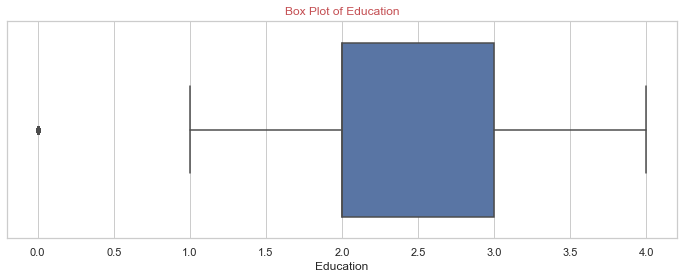

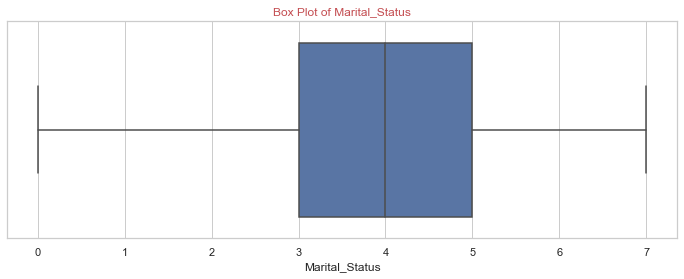

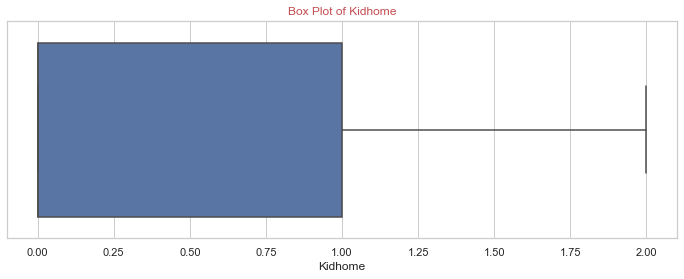

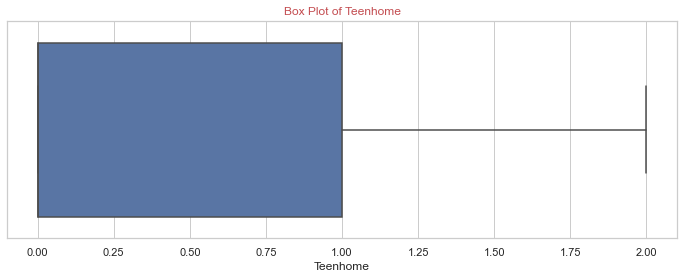

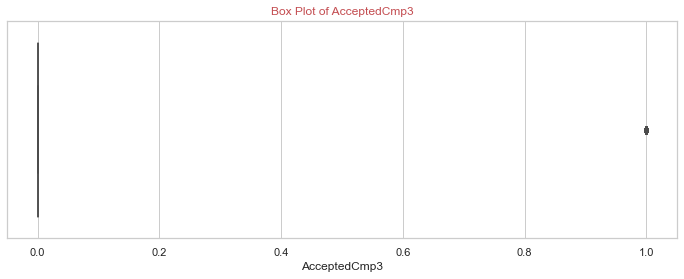

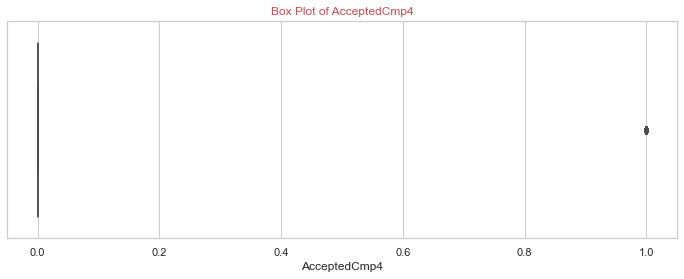

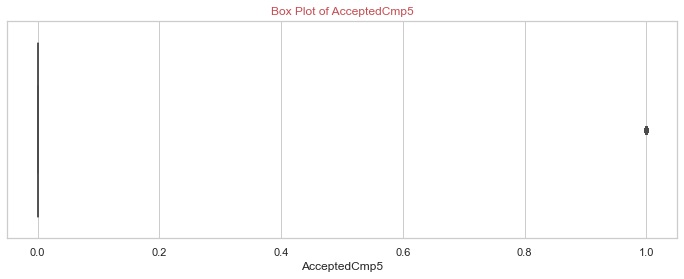

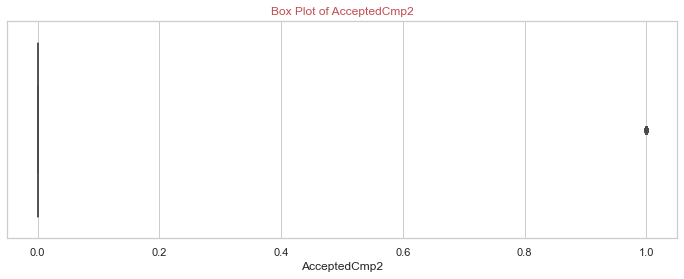

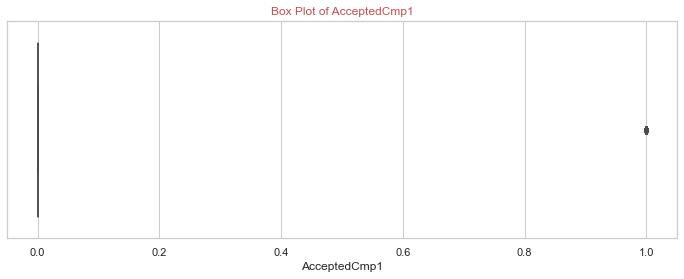

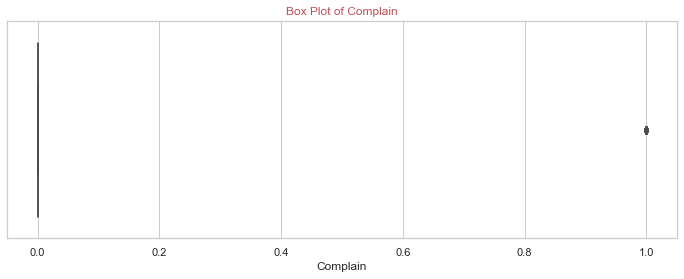

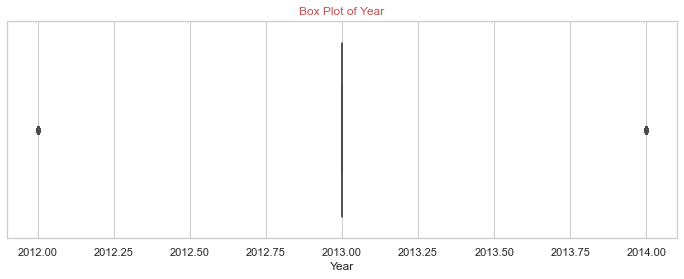

In [55]:
for i in df_cat.columns:
    sns.boxplot(df_cat[i])
    plt.title(f"Box Plot of {i}", color="r")
    plt.show()

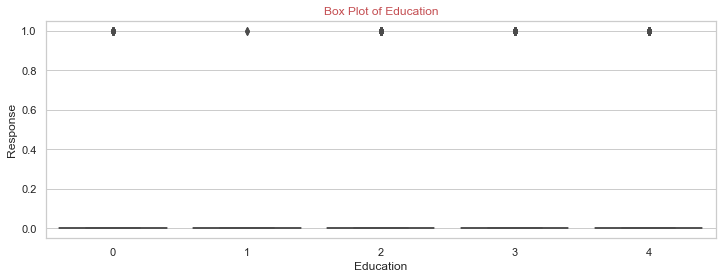

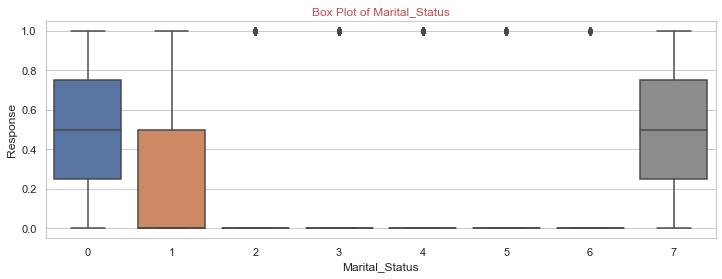

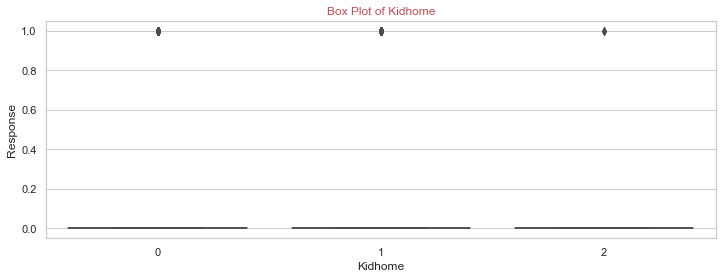

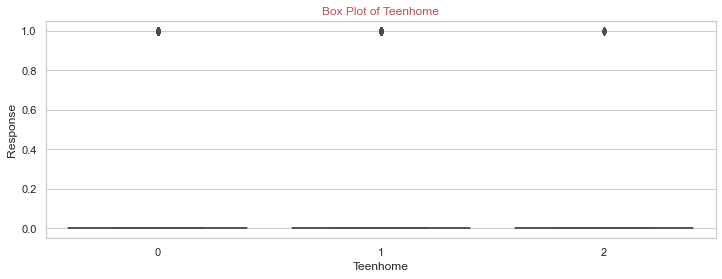

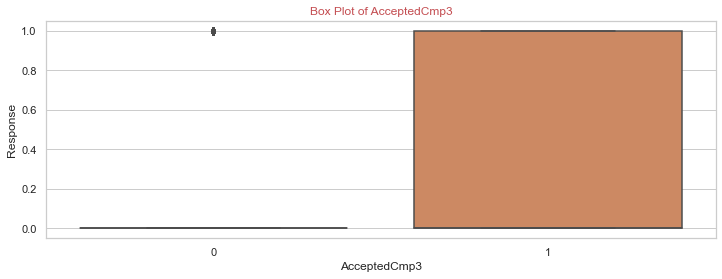

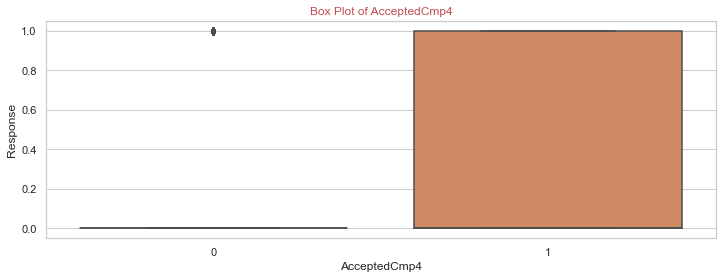

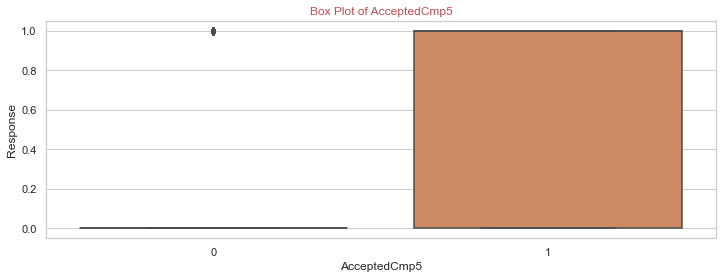

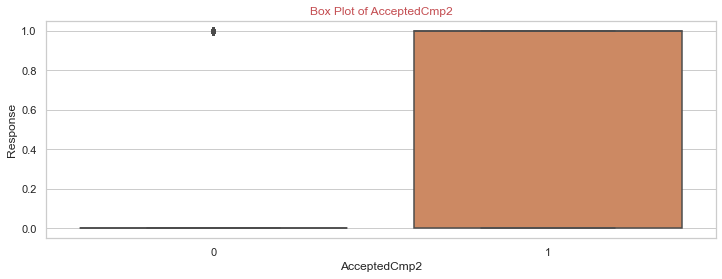

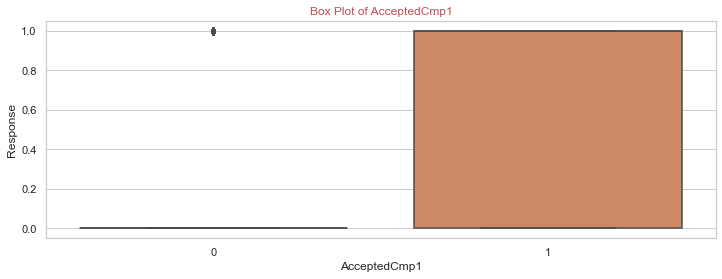

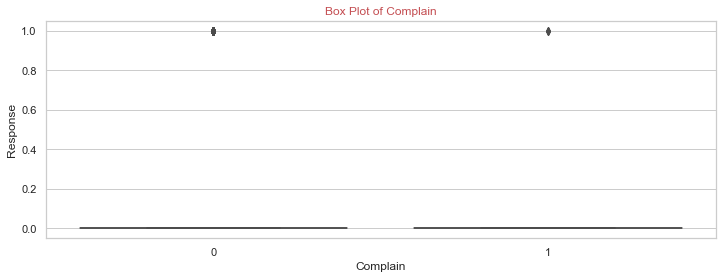

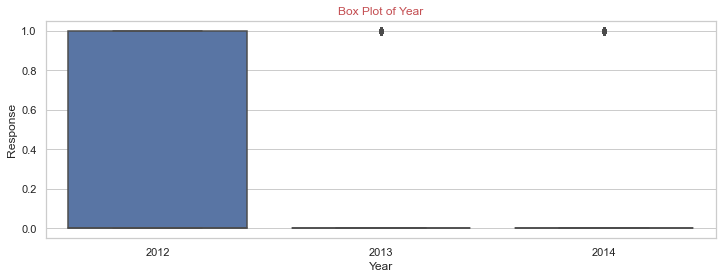

In [56]:
for i in df_cat.columns:
    sns.boxplot(df_cat[i], df.Response)
    plt.title(f"Box Plot of {i}", color="r")
    plt.show()

# 

# Merging category levels after --- "Tukey HSD"

In [57]:
df.Education = df.get("Education").replace(0, 1)
df.Education = df.get("Education").replace(4, 3)

In [58]:
df.Education.value_counts()

2.0    1116
3.0     846
1.0     254
Name: Education, dtype: int64

### 1 -- Under Graduate
### 2 -- Graduate
### 3 -- Above Graduate

In [59]:
df.Marital_Status = df.get("Marital_Status").replace(5, 3)
df.Marital_Status = df.get("Marital_Status").replace(7, 4)
df.Marital_Status = df.get("Marital_Status").replace(6, 1)
df.Marital_Status = df.get("Marital_Status").replace(0, 1)
df.Marital_Status = df.get("Marital_Status").replace(2, 1)

In [60]:
df.Marital_Status = df.get("Marital_Status").replace(4, 1)
df.Marital_Status.value_counts()

3.0    1430
1.0     786
Name: Marital_Status, dtype: int64

### 3 -- Together & Married
### 1 -- Alone (Divorced, Widow, Absured, Single & Yolo)

In [61]:
df.Kidhome = df.get("Kidhome").replace(2, 1)
df.Teenhome = df.get("Teenhome").replace(2, 1)

In [62]:
df.Kidhome.value_counts()

0    1283
1     933
Name: Kidhome, dtype: int64

In [63]:
df.Teenhome.value_counts()

0    1147
1    1069
Name: Teenhome, dtype: int64

# Hypotesis Testing after merging of Categories

In [64]:
col_dict = {"Education", "Marital_Status", "Kidhome", "Teenhome"}

for columns in  col_dict:
    mod_S = ols('Response ~ df[columns]', data = df).fit()
    aov = sm.stats.anova_lm(mod_S, type=2)
    print(columns)
    print(aov)
    
    print("")

Kidhome
                 df      sum_sq   mean_sq          F    PR(>F)
df[columns]     1.0    1.472449  1.472449  11.581344  0.000678
Residual     2214.0  281.487388  0.127140        NaN       NaN

Marital_Status
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    6.380285  6.380285  51.073732  1.202530e-12
Residual     2214.0  276.579553  0.124923        NaN           NaN

Education
                 df      sum_sq   mean_sq          F    PR(>F)
df[columns]     1.0    2.059245  2.059245  16.230537  0.000058
Residual     2214.0  280.900593  0.126875        NaN       NaN

Teenhome
                 df      sum_sq   mean_sq          F        PR(>F)
df[columns]     1.0    7.319499  7.319499  58.791722  2.605761e-14
Residual     2214.0  275.640339  0.124499        NaN           NaN



In [65]:
col_dict = {"Education", "Marital_Status", "Kidhome", "Teenhome"}

for columns in  col_dict:
    tuk_hsd = pairwise_tukeyhsd(df.Response, df[columns], alpha = 0.05)
    print(columns)
    print("\n", tuk_hsd)
    
    print("")

Kidhome

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0522 0.001 -0.0823 -0.0221   True
---------------------------------------------------

Marital_Status

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    3.0  -0.1122 0.001 -0.1429 -0.0814   True
---------------------------------------------------

Education

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.0417 0.2117 -0.0164 0.0998  False
   1.0    3.0   0.0911  0.001  0.0313 0.1509   True
   2.0    3.0   0.0494 0.0068  0.0113 0.0875   True
---------------------------------------------------

Teenhome

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 grou

# Visualization after Merging Categories

In [66]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Day'],
      dtype='object')

In [67]:
cat = df[['Education', 'Marital_Status', 'Kidhome','Teenhome']]

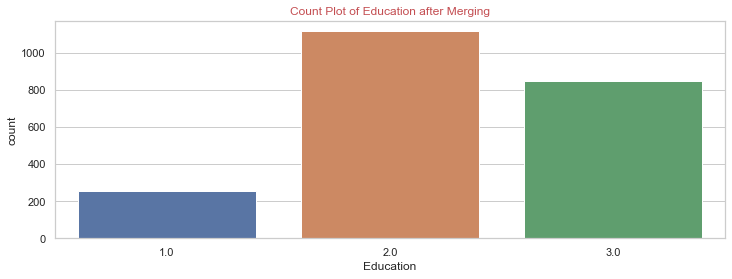

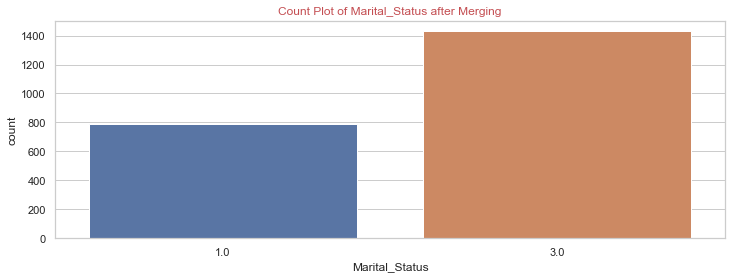

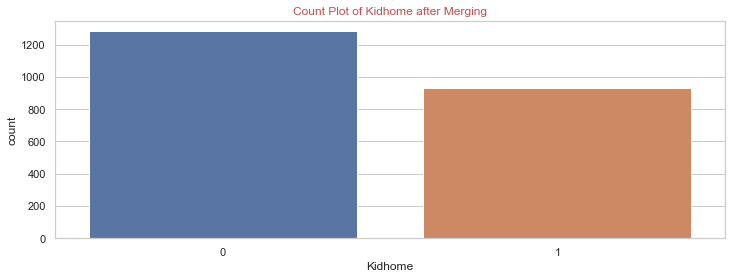

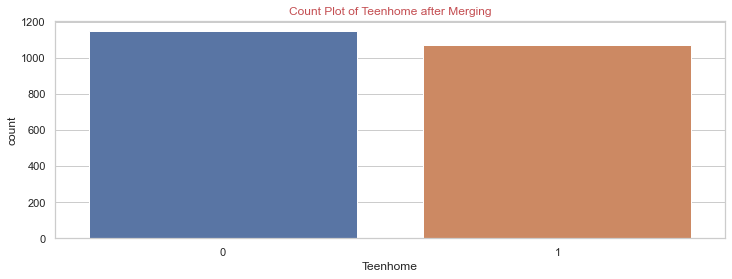

In [68]:
for i in cat.columns:
    sns.countplot(cat[i])
    plt.title(f"Count Plot of {i} after Merging", color="r")
    plt.show()

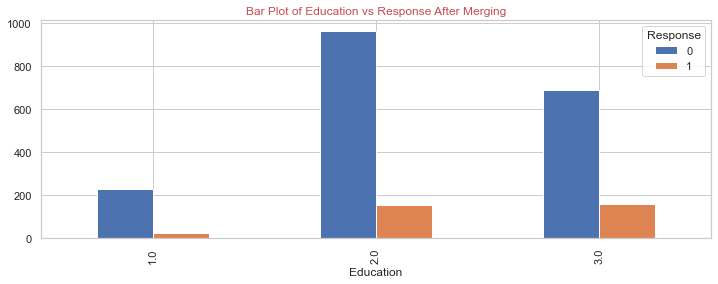

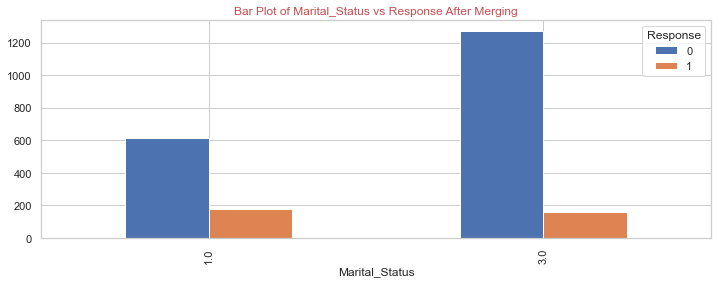

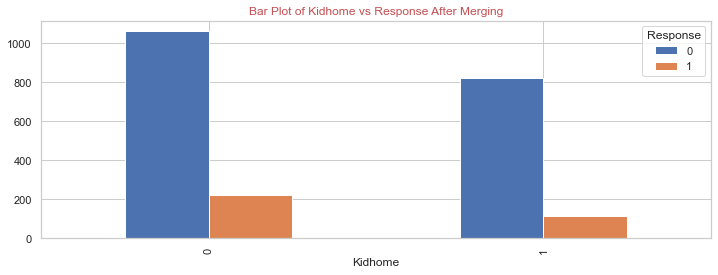

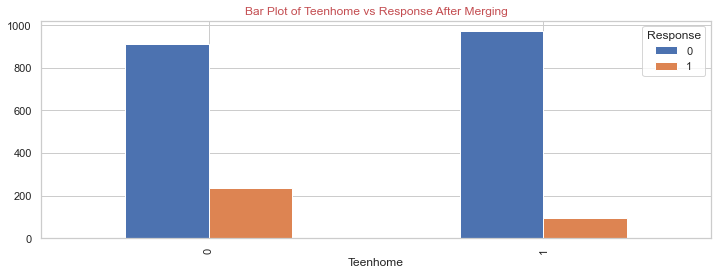

In [69]:
for i in cat.columns:
    pd.crosstab(cat[i], df.Response).plot(kind='bar')
    plt.title(f"Bar Plot of {i} vs Response After Merging", color="r")
    plt.show()

# Corelation Plot

Text(0.5, 1.0, 'Correlation of Response(Target) with Predictor variables')

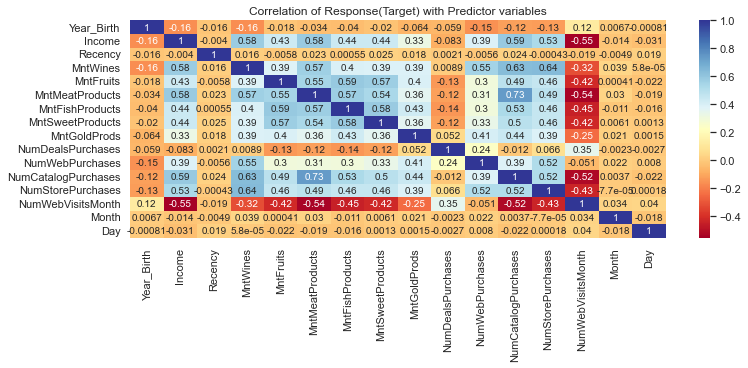

In [70]:
corrmat = df_cont.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_cont[top_corr_features].corr(),annot=True,cmap="RdYlBu")
plt.title("Correlation of Response(Target) with Predictor variables", color="g")

# Feature Selection / Importance

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   float64
 2   Marital_Status       2216 non-null   float64
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [72]:
x = df.loc[:, df.columns != "Response"]

x.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year,Month,Day
0,1957,2.0,1.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,2012,4,9
1,1954,2.0,1.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2014,8,3
2,1965,2.0,3.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,2013,8,21


In [73]:
y = df.Response

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=9)

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_var = df.columns.values.tolist()

y = ["Response"]

x = [i for i in df_var if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg)

rfe = rfe.fit(x_train, y_train.ravel())

print(rfe.support_)

print(rfe.ranking_)

[False  True  True False False  True False False False False False False
 False  True  True  True  True  True  True  True  True  True  True False
 False False False]
[ 5  1  1 14  3  1  2 10  7  8 12 11  9  1  1  1  1  1  1  1  1  1  1 15
  4  6 13]


In [76]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Day'],
      dtype='object')

# Feature Importance using Random Forest

In [77]:
rf = RandomForestClassifier(n_estimators = 300, bootstrap = True, max_features = "sqrt")

In [78]:
rfFit = rf.fit(x_train, y_train)

In [79]:
fi = pd.DataFrame({"feature" : list(x_train.columns),
                  "importance": rfFit.feature_importances_}).\
                  sort_values("importance", ascending = False)

In [80]:
fi

,feature,importance
6,Recency,0.094281
7,MntWines,0.077839
3,Income,0.068989
9,MntMeatProducts,0.067249
12,MntGoldProds,0.052276
0,Year_Birth,0.046811
18,AcceptedCmp3,0.041961
26,Day,0.041717
17,NumWebVisitsMonth,0.040794
8,MntFruits,0.040516


In [81]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Day'],
      dtype='object')

# Dropping variables after feature selection is done

In [82]:
df.drop(['Year_Birth', 'Kidhome','MntFishProducts', 'NumDealsPurchases','NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2','Complain', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [83]:
df.shape

(2216, 15)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   float64
 1   Marital_Status       2216 non-null   float64
 2   Income               2216 non-null   float64
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  AcceptedCmp3         2216 non-null   int64  
 13  AcceptedCmp5         2216 non-null   int64  
 14  Response             2216 non-null   int64  
dtypes: float64(3), int64(12)
memory usage:

# Train Test Splitting

In [85]:
x = df.iloc[:, 0:14]
x.head(3)

,Education,Marital_Status,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5
0,2.0,1.0,58138.0,0,58,635,88,546,88,88,8,10,0,0
1,2.0,1.0,46344.0,1,38,11,1,6,1,6,1,1,0,0
2,2.0,3.0,71613.0,0,26,426,49,127,21,42,8,2,0,0


In [86]:
y = df.Response

# Implementing the model

In [90]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.302910
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.284      
Dependent Variable:   Response         AIC:              1370.4984  
Date:                 2022-03-08 23:49 BIC:              1450.3468  
No. Observations:     2216             Log-Likelihood:   -671.25    
Df Model:             13               LL-Null:          -937.76    
Df Residuals:         2202             LLR p-value:      1.3983e-105
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Education            0.3312   0.0919   3.6046 0.0003  0.1511  0.5113
Marital_Status      -0.6141 

## As the P value of 3 Variables are more than 5% we are droping them

In [91]:
df.drop(["MntFruits", "MntSweetProducts", "MntGoldProds"], axis=1, inplace=True)

In [99]:
df.shape

(2216, 12)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   float64
 1   Marital_Status       2216 non-null   float64
 2   Income               2216 non-null   float64
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   NumWebPurchases      2216 non-null   int64  
 8   NumCatalogPurchases  2216 non-null   int64  
 9   AcceptedCmp3         2216 non-null   int64  
 10  AcceptedCmp5         2216 non-null   int64  
 11  Response             2216 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 289.6 KB


In [105]:
x = df.drop(['Response'],axis = 1)
x.head(3)

,Education,Marital_Status,Income,Teenhome,Recency,MntWines,MntMeatProducts,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp5
0,2.0,1.0,58138.0,0,58,635,546,8,10,0,0
1,2.0,1.0,46344.0,1,38,11,6,1,1,0,0
2,2.0,3.0,71613.0,0,26,426,127,8,2,0,0


In [106]:
y = df.Response

# 

# Implementing the model after Droping 3 Columns

In [107]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303201
         Iterations 7
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.284      
Dependent Variable:   Response         AIC:              1365.7890  
Date:                 2022-03-09 00:03 BIC:              1428.5270  
No. Observations:     2216             Log-Likelihood:   -671.89    
Df Model:             10               LL-Null:          -937.76    
Df Residuals:         2205             LLR p-value:      7.2375e-108
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Education            0.3432   0.0894   3.8408 0.0001  0.1681  0.5183
Marital_Status      -0.6116 

# Corelation Matrix

Text(0.5, 1.0, 'Correlation of Response(Target) with Predictor variables')

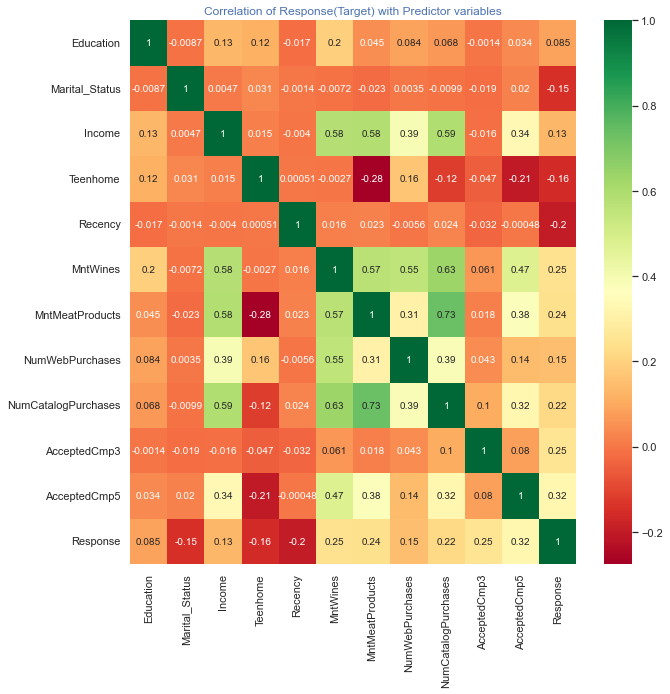

In [151]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title("Correlation of Response(Target) with Predictor variables", color="b")

#  Standardize the data using StandardScaler

In [124]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(x)

StandardScaler()

In [125]:
x = s.fit_transform(x)

# Train Test Split

In [127]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, random_state= 9, test_size=0.20)

In [128]:
x_train.shape

(1772, 11)

In [129]:
x_test.shape

(444, 11)

In [130]:
y_train.shape

(1772,)

In [131]:
y_test.shape

(444,)

# SMOTE

In [132]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 9)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1500 

After OverSampling, the shape of train_X: (3000, 11)
After OverSampling, the shape of train_y: (3000,) 

After OverSampling, counts of label '1': 1500
After OverSampling, counts of label '0': 1500


In [133]:
x_train_res.shape

(3000, 11)

# Logistic Regression Model

In [134]:
log = LogisticRegression()
log

LogisticRegression()

In [135]:
logfit = log.fit(x_train_res, y_train_res)

In [136]:
Pred = logfit.predict(x_test)

In [143]:
pd.crosstab(y_test, Pred, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,287,96,383
1,13,48,61
All,300,144,444


In [142]:
accuracy_score(y_test, Pred)

0.7545045045045045

In [139]:
Report = classification_report(y_test,Pred)
print(Report)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       383
           1       0.33      0.79      0.47        61

    accuracy                           0.75       444
   macro avg       0.65      0.77      0.65       444
weighted avg       0.87      0.75      0.79       444



In [144]:
predPB = log.predict_proba(x_test)[:, 1]

In [145]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, predPB)

In [146]:
roc_auc = auc(fpr, tpr)

roc_auc

0.8447117236656252

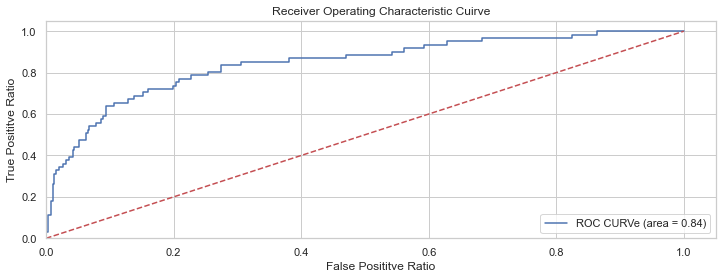

In [147]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC CURVe (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

#  Naïve Bayes Model

In [152]:
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)

GaussianNB()

In [153]:
y_pred_NB = gnb.predict(x_test)

In [154]:
pd.crosstab(y_test, y_pred_NB, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,313,70,383
1,23,38,61
All,336,108,444


In [155]:
accuracy_score(y_test, y_pred_NB)

0.7905405405405406

In [156]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       383
           1       0.35      0.62      0.45        61

    accuracy                           0.79       444
   macro avg       0.64      0.72      0.66       444
weighted avg       0.85      0.79      0.81       444



In [177]:
predPB = gnb.predict_proba(x_test)[:, 1]

In [178]:
fprN, tprN, thresholdsN = sklearn.metrics.roc_curve(y_test, predPB)

In [179]:
roc_aucN = auc(fprN, tprN)

roc_aucN

0.797500321020417

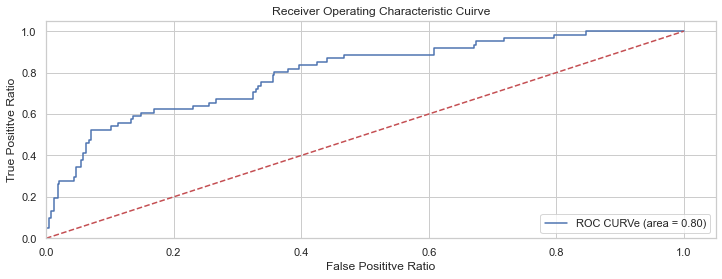

In [180]:
plt.figure()
plt.plot(fprN, tprN, label = "ROC CURVe (area = %0.2f)" % roc_aucN)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# KNN Model

In [159]:
k_range = range(1,40)

scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [161]:
scores_list

[0.8378378378378378,
 0.8626126126126126,
 0.8716216216216216,
 0.8716216216216216,
 0.8828828828828829,
 0.8716216216216216,
 0.8761261261261262,
 0.8738738738738738,
 0.8873873873873874,
 0.8851351351351351,
 0.8873873873873874,
 0.8806306306306306,
 0.8896396396396397,
 0.8896396396396397,
 0.8963963963963963,
 0.8873873873873874,
 0.8941441441441441,
 0.8941441441441441,
 0.8896396396396397,
 0.8918918918918919,
 0.8851351351351351,
 0.8851351351351351,
 0.8806306306306306,
 0.8761261261261262,
 0.8806306306306306,
 0.8851351351351351,
 0.8828828828828829,
 0.8828828828828829,
 0.8941441441441441,
 0.8806306306306306,
 0.8828828828828829,
 0.8716216216216216,
 0.8693693693693694,
 0.8716216216216216,
 0.8716216216216216,
 0.8693693693693694,
 0.8693693693693694,
 0.8648648648648649,
 0.8738738738738738]

In [162]:
error_rate = []

for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(x_train, y_train) 
    pred_i = knn.predict(x_test) 
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

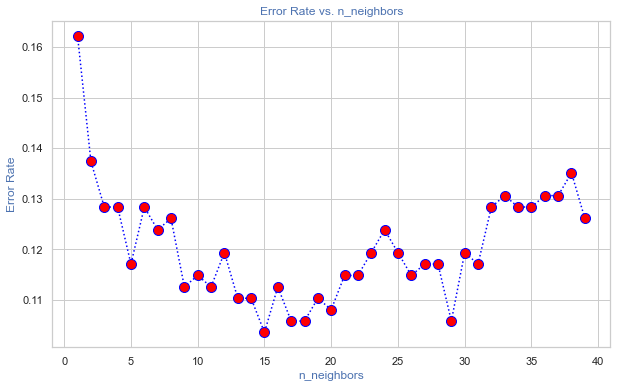

In [163]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dotted', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. n_neighbors', color = "b") 
plt.xlabel('n_neighbors', color = "b") 
plt.ylabel('Error Rate', color = "b")

In [164]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn

KNeighborsClassifier(n_neighbors=15)

In [165]:
mpm_knn = knn.fit(x_train_res, y_train_res) 
mpm_knn

KNeighborsClassifier(n_neighbors=15)

In [166]:
y_pred = mpm_knn.predict(x_test)

In [169]:
mpm_knn.score(x_test, y_test)

0.7635135135135135

In [167]:
pd.crosstab(y_test, y_pred, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,292,91,383
1,14,47,61
All,306,138,444


In [168]:
accuracy_score(y_test, y_pred)

0.7635135135135135

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       383
           1       0.34      0.77      0.47        61

    accuracy                           0.76       444
   macro avg       0.65      0.77      0.66       444
weighted avg       0.87      0.76      0.80       444



In [181]:
predPB = knn.predict_proba(x_test)[:, 1]

In [182]:
fprK, tprK, thresholdsK = sklearn.metrics.roc_curve(y_test, predPB)

In [183]:
roc_aucK = auc(fprK, tprK)

roc_aucK

0.8225827162607542

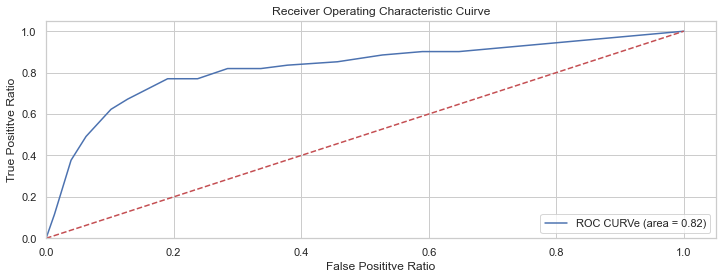

In [214]:
plt.figure()
plt.plot(fprK, tprK, label = "ROC CURVe (area = %0.2f)" % roc_aucK)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# SVM Classifier Model

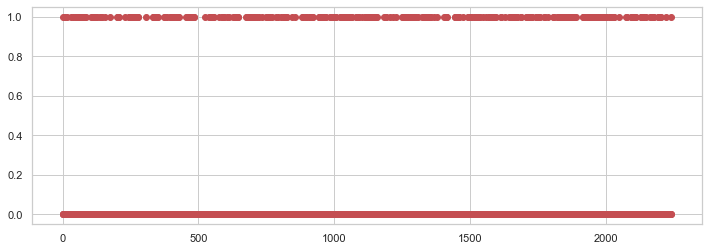

In [171]:
plt.plot(df.Response, "ro")

## Linear case-1

In [172]:
svcl = svm.SVC(kernel = "linear", C = 1, gamma = "auto",
              probability = True).fit(x_train_res, y_train_res)

svcl

SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [173]:
y_pred_l = svcl.predict(x_test)

In [174]:
pd.crosstab(y_test, y_pred_l, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,289,94,383
1,13,48,61
All,302,142,444


In [175]:
accuracy_score(y_test, y_pred_l)

0.759009009009009

In [176]:
print(classification_report(y_test, y_pred_l))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       383
           1       0.34      0.79      0.47        61

    accuracy                           0.76       444
   macro avg       0.65      0.77      0.66       444
weighted avg       0.87      0.76      0.79       444



In [204]:
predPB = svcl.predict_proba(x_test)[:, 1]

In [205]:
fprSL, tprSL, thresholdsSL = sklearn.metrics.roc_curve(y_test, predPB)

In [206]:
roc_aucSL = auc(fprSL, tprSL)

roc_aucSL

0.8423147712194495

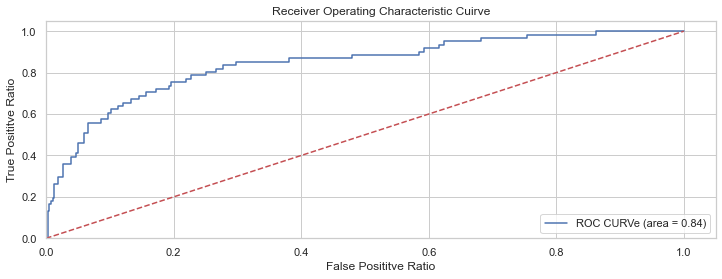

In [213]:
plt.figure()
plt.plot(fprSL, tprSL, label = "ROC CURVe (area = %0.2f)" % roc_aucSL)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

## poly case

In [186]:
svcp = svm.SVC(kernel = "poly", C = 1, gamma = "auto",
              probability = True).fit(x_train_res, y_train_res)

svcp

SVC(C=1, gamma='auto', kernel='poly', probability=True)

In [188]:
y_pred_p = svcp.predict(x_test)

In [189]:
pd.crosstab(y_test, y_pred_p, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,337,46,383
1,20,41,61
All,357,87,444


In [190]:
accuracy_score(y_test, y_pred_p)

0.8513513513513513

In [191]:
print(classification_report(y_test, y_pred_p))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       383
           1       0.47      0.67      0.55        61

    accuracy                           0.85       444
   macro avg       0.71      0.78      0.73       444
weighted avg       0.88      0.85      0.86       444



In [208]:
predPB = svcp.predict_proba(x_test)[:, 1]

In [210]:
fprSP, tprSP, thresholdsSP = sklearn.metrics.roc_curve(y_test, predPB)

In [211]:
roc_aucSP = auc(fprSP, tprSP)

roc_aucSP

0.8202713692590848

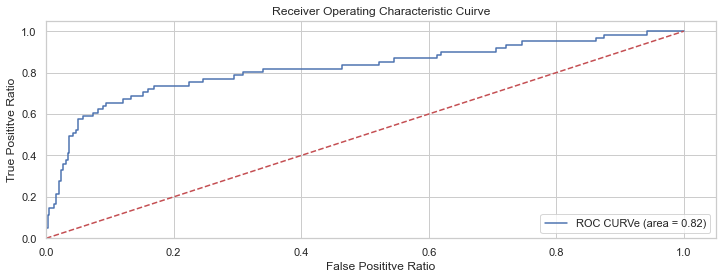

In [212]:
plt.figure()
plt.plot(fprSP, tprSP, label = "ROC CURVe (area = %0.2f)" % roc_aucSP)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

## rbf case

In [192]:
svcr = svm.SVC(C = 1, gamma = "auto",
              probability = True).fit(x_train_res, y_train_res)

svcr

SVC(C=1, gamma='auto', probability=True)

In [194]:
y_pred_r = svcr.predict(x_test)

In [195]:
pd.crosstab(y_test, y_pred_r, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,317,66,383
1,15,46,61
All,332,112,444


In [196]:
accuracy_score(y_test, y_pred_r)

0.8175675675675675

In [197]:
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       383
           1       0.41      0.75      0.53        61

    accuracy                           0.82       444
   macro avg       0.68      0.79      0.71       444
weighted avg       0.88      0.82      0.84       444



In [215]:
predPB = svcr.predict_proba(x_test)[:, 1]

In [216]:
fprSR, tprSR, thresholdsSR = sklearn.metrics.roc_curve(y_test, predPB)

In [217]:
roc_aucSR = auc(fprSR, tprSR)

roc_aucSR

0.8281470701536618

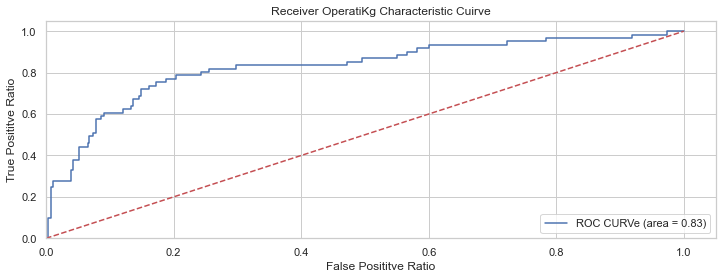

In [218]:
plt.figure()
plt.plot(fprSR, tprSR, label = "ROC CURVe (area = %0.2f)" % roc_aucSR)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver OperatiKg Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# Random Forest Model

In [219]:
rf = RandomForestClassifier(n_estimators = 300, bootstrap = True, max_features = "sqrt")

In [220]:
rfFit = rf.fit(x_train_res, y_train_res)

In [221]:
y_predRF = rfFit.predict(x_test)

In [222]:
pd.crosstab(y_test, y_predRF, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,348,35,383
1,26,35,61
All,374,70,444


In [223]:
accuracy_score(y_test, y_predRF)

0.8626126126126126

In [224]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       383
           1       0.50      0.57      0.53        61

    accuracy                           0.86       444
   macro avg       0.72      0.74      0.73       444
weighted avg       0.87      0.86      0.87       444



In [225]:
predP_RF = rfFit.predict_proba(x_test)[:, 1]

In [226]:
fprRF, tprRF, thresholdsRF = sklearn.metrics.roc_curve(y_test, predP_RF)

In [227]:
roc_aucRF = auc(fprRF, tprRF)
roc_aucRF

0.8319779137953175

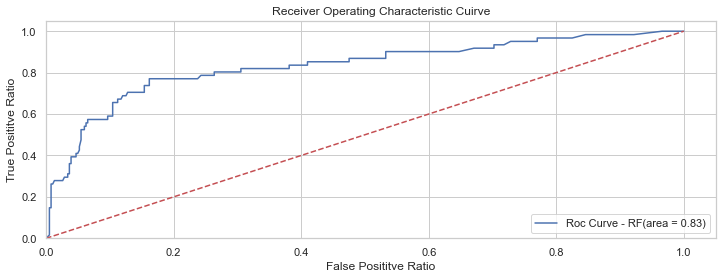

In [228]:
plt.figure()
plt.plot(fprRF, tprRF, label= "Roc Curve - RF(area = %0.2f)" % roc_aucRF)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# ### ------------------- -------------------------------------

# Decision Tree Classifier ------ Ensemble Modelling techniques

# Adaptive Boosting Model

In [229]:
ada = AdaBoostClassifier(RandomForestClassifier(max_depth= 4), n_estimators= 300)

In [230]:
adaFit = ada.fit(x_train_res, y_train_res)

adaFit

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4),
                   n_estimators=300)

In [231]:
y_predADA = ada.predict(x_test)

In [232]:
pd.crosstab(y_test, y_predADA, margins= True,rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,362,21,383
1,23,38,61
All,385,59,444


In [233]:
accuracy_score(y_test, y_predADA)

0.9009009009009009

In [234]:
print(classification_report(y_test, y_predADA))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       383
           1       0.64      0.62      0.63        61

    accuracy                           0.90       444
   macro avg       0.79      0.78      0.79       444
weighted avg       0.90      0.90      0.90       444



In [235]:
predP_ADA = adaFit.predict_proba(x_test)[:, 1]

In [236]:
fprADA, tprADA, thresholdsADA = sklearn.metrics.roc_curve(y_test, predP_ADA)

In [237]:
roc_aucADA = auc(fprADA, tprADA)
roc_aucADA

0.8467234516115225

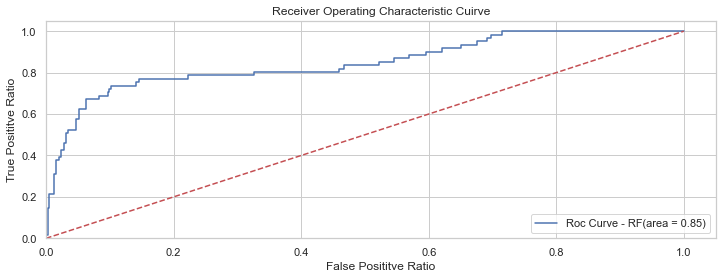

In [239]:
plt.figure()
plt.plot(fprADA, tprADA, label= "Roc Curve - RF(area = %0.2f)" % roc_aucADA)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# Bagging Model

In [243]:
b = BaggingClassifier(base_estimator= rf, n_estimators=200, oob_score= True, n_jobs= -1)

In [244]:
b.fit(x_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                        n_estimators=300),
                  n_estimators=200, n_jobs=-1, oob_score=True)

In [245]:
y_predB = b.predict(x_test)

In [246]:
pd.crosstab(y_test, y_predB, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,346,37,383
1,22,39,61
All,368,76,444


In [247]:
accuracy_score(y_test, y_predB)

0.8671171171171171

In [248]:
print(classification_report(y_test, y_predB))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       383
           1       0.51      0.64      0.57        61

    accuracy                           0.87       444
   macro avg       0.73      0.77      0.75       444
weighted avg       0.88      0.87      0.87       444



In [249]:
predB = b.predict_proba(x_test)[:, 1]

In [250]:
fprB, tprB, thresholdsB = sklearn.metrics.roc_curve(y_test, predB)

In [251]:
roc_aucB = auc(fprB, tprB)

roc_aucB

0.841201900440868

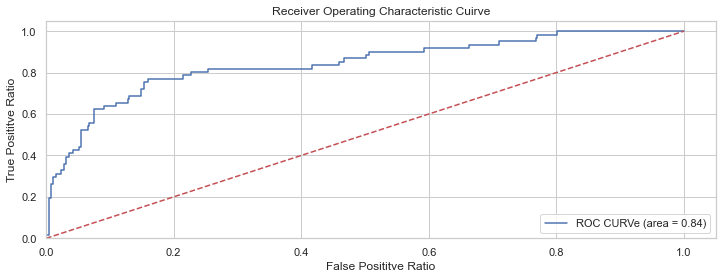

In [252]:
plt.figure()
plt.plot(fprB, tprB, label = "ROC CURVe (area = %0.2f)" % roc_aucB)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# Gradient Boosting Classification Model with "300" estimators

In [253]:
GB = GradientBoostingClassifier(n_estimators= 300)

In [254]:
GB_fit = GB.fit(x_train_res, y_train_res)

In [255]:
y_predGB = GB.predict(x_test)

In [256]:
pd.crosstab(y_test, y_predGB, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,353,30,383
1,24,37,61
All,377,67,444


In [257]:
accuracy_score(y_test, y_predGB)

0.8783783783783784

In [259]:
print(classification_report(y_test, y_predGB))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       383
           1       0.55      0.61      0.58        61

    accuracy                           0.88       444
   macro avg       0.74      0.76      0.75       444
weighted avg       0.88      0.88      0.88       444



In [260]:
predP_GB = GB_fit.predict_proba(x_test)[:, 1]

In [261]:
fprGB, tprGB, thresholdsGB = sklearn.metrics.roc_curve(y_test, predP_GB)

In [262]:
roc_aucGB = auc(fprGB, tprGB)
roc_aucGB

0.8515173565038736

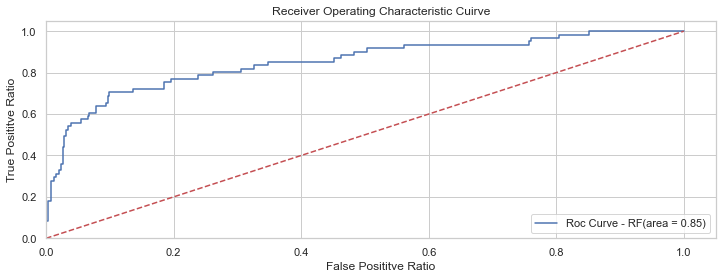

In [264]:
plt.figure()
plt.plot(fprGB, tprGB, label= "Roc Curve - RF(area = %0.2f)" % roc_aucGB)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# Grid Search Model

In [265]:
model = GradientBoostingClassifier()
params = {"n_estimators":range(1, 300)}
grid = GridSearchCV(estimator= model, cv = 3, param_grid = params, scoring= "neg_mean_squared_error")
grid.fit(x_train_res, y_train_res)

print("The best estimator returned by GridSearch CV is :", grid.best_estimator_)

The best estimator returned by GridSearch CV is : GradientBoostingClassifier(n_estimators=248)


In [266]:
GB_G = grid.best_estimator_

In [267]:
GB_G_fit = GB_G.fit(x_train_res, y_train_res)

GB_G_fit

GradientBoostingClassifier(n_estimators=248)

In [268]:
y_predGB_G = GB_G.predict(x_test)

In [269]:
pd.crosstab(y_test, y_predGB_G, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,349,34,383
1,20,41,61
All,369,75,444


In [270]:
accuracy_score(y_test, y_predGB_G)

0.8783783783783784

In [271]:
print(classification_report(y_test, y_predGB_G))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       383
           1       0.55      0.67      0.60        61

    accuracy                           0.88       444
   macro avg       0.75      0.79      0.77       444
weighted avg       0.89      0.88      0.88       444



In [272]:
predGB_G = GB_G_fit.predict_proba(x_test)[:, 1]

In [273]:
fprGB_G, tprGB_G, thresholdsGB_G = sklearn.metrics.roc_curve(y_test, predGB_G)

In [274]:
roc_aucGB_G = auc(fprGB_G, tprGB_G)
roc_aucGB_G

0.8532294653939991

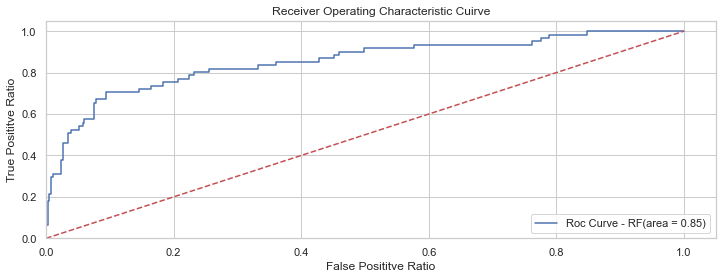

In [275]:
plt.figure()
plt.plot(fprGB_G, tprGB_G, label= "Roc Curve - RF(area = %0.2f)" % roc_aucGB_G)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# Randomized Search Model

In [278]:
mod = GradientBoostingClassifier()
params = {"n_estimators":range(1, 300)}
Randomized = RandomizedSearchCV(estimator=mod,
            param_distributions=params,
            cv=4,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            random_state=7)
Randomized.fit(x_train_res, y_train_res)

print("The best estimator returned by RandomizedSearchCV is :", Randomized.best_estimator_)

The best estimator returned by RandomizedSearchCV is : GradientBoostingClassifier(n_estimators=294)


In [279]:
GB_R = Randomized.best_estimator_

In [281]:
GB_R_fit = GB_R.fit(x_train_res, y_train_res)

GB_R_fit

GradientBoostingClassifier(n_estimators=294)

In [283]:
y_predGB_R = GB_R.predict(x_test)

In [284]:
pd.crosstab(y_test, y_predGB_R, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,353,30,383
1,24,37,61
All,377,67,444


In [285]:
accuracy_score(y_test, y_predGB_R)

0.8783783783783784

In [286]:
print(classification_report(y_test, y_predGB_R))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       383
           1       0.55      0.61      0.58        61

    accuracy                           0.88       444
   macro avg       0.74      0.76      0.75       444
weighted avg       0.88      0.88      0.88       444



In [287]:
predGB_R = GB_R_fit.predict_proba(x_test)[:, 1]

In [288]:
fprGB_R, tprGB_R, thresholdsGB_R = sklearn.metrics.roc_curve(y_test, predGB_R)

In [289]:
roc_aucGB_R = auc(fprGB_R, tprGB_R)
roc_aucGB_R

0.8507469075033172

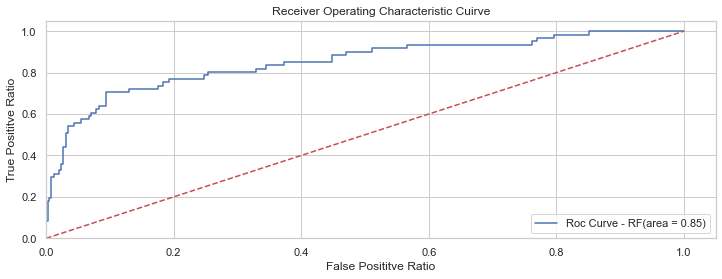

In [290]:
plt.figure()
plt.plot(fprGB_R, tprGB_R, label= "Roc Curve - RF(area = %0.2f)" % roc_aucGB_R)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()

# 

# XG Boost Model

In [306]:
import xgboost
from xgboost.sklearn import XGBClassifier

In [307]:
xgb = xgboost.XGBClassifier()

In [308]:
xgb_fit = xgb.fit(x_train_res, y_train_res)
xgb_fit

[01:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [309]:
y_predXGB = xgb.predict(x_test)

In [310]:
pd.crosstab(y_test, y_predXGB, margins= True, rownames= ["Actual"], colnames= ["Predict"])

Predict,0,1,All
Actual,,,
0,357,26,383
1,25,36,61
All,382,62,444


In [311]:
accuracy_score(y_test, y_predXGB)

0.8851351351351351

In [312]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       383
           1       0.58      0.59      0.59        61

    accuracy                           0.89       444
   macro avg       0.76      0.76      0.76       444
weighted avg       0.89      0.89      0.89       444



In [313]:
predXGB = xgb_fit.predict_proba(x_test)[:, 1]

In [314]:
fprXGB, tprXGB, thresholdsXGB = sklearn.metrics.roc_curve(y_test, predXGB)

In [315]:
roc_aucXGB = auc(fprXGB, tprXGB)
roc_aucXGB

0.8297307708770278

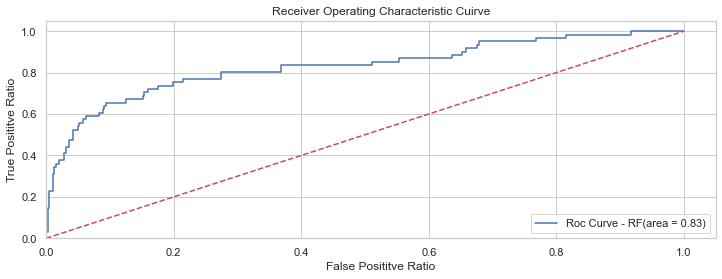

In [316]:
plt.figure()
plt.plot(fprXGB, tprXGB, label= "Roc Curve - RF(area = %0.2f)" % roc_aucXGB)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Posititve Ratio")
plt.ylabel("True Posititve Ratio")
plt.title("Receiver Operating Characteristic Cuirve")
plt.legend(loc = "lower right")
plt.show()